# Análise Exploratória de Dados

* Como os valores de alugueis estão distribuidos?
* Existe relação entre o número de quartos e o valor do aluguel?
* O que podemos observar sobre a possibilidade de aceitar animais?
* Qual a relação entre cidades e os números de quartos?
* Imóvel mobiliado impacta no preço do aluguel?
* Como estão distribuidos os imóveis por número de banheiros?
* Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?
* E o seguro incêndio?
* Existe qualquer impacto do valor do iptu em relação ao valor imóvel?

Importando as bibliotecas necessárias

In [2]:
#manipulação dados
import numpy as np
import pandas as pd

#gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
import plotly.express as px

#banco de dados
import sqlite3

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# testar diferentes modelos de IA
from pycaret.regression import *

### Carregando a Base de Dados

Os dados foram transformados usando o airflow, basicamente o script copiava a base de dados para outro banco chamado 'imoveis_dw.db', com os dados transformado para realizar nossas análises.

In [3]:
connect_dw_imoveis = sqlite3.connect("../data/imoveis_dw.db")

In [4]:
#usando o metodo do pandas para ler dados sql
data = pd.read_sql_query(r"""
    SELECT * FROM IMOVEIS
    """, 
    connect_dw_imoveis
    )

In [5]:
data.head()

cidade estado  area  num_quartos  num_banheiros  garagem  \
0     São Paulo     SP    70            2              1        1   
1     São Paulo     SP   320            4              4        0   
2  Porto Alegre     RS    80            1              1        1   
3  Porto Alegre     RS    51            2              1        0   
4     São Paulo     SP    25            1              1        0   

   num_andares  aceita_animais  mobilia  valor_aluguel  valor_condominio  \
0            7               1        1           3300              2065   
1           20               1        0           4960              1200   
2            6               1        0           2800              1000   
3            2               1        0           1112               270   
4            1               0        0            800                 0   

   valor_iptu  valor_seguro_incendio  
0         211                     42  
1        1750                     63  
2           0                     41  
3          22                     17  
4          25                     11

Exibindo as informações da base de dados

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cidade                 10692 non-null  object
 1   estado                 10692 non-null  object
 2   area                   10692 non-null  int64 
 3   num_quartos            10692 non-null  int64 
 4   num_banheiros          10692 non-null  int64 
 5   garagem                10692 non-null  int64 
 6   num_andares            10692 non-null  int64 
 7   aceita_animais         10692 non-null  int64 
 8   mobilia                10692 non-null  int64 
 9   valor_aluguel          10692 non-null  int64 
 10  valor_condominio       10692 non-null  int64 
 11  valor_iptu             10692 non-null  int64 
 12  valor_seguro_incendio  10692 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.1+ MB


### Análise Estatística Básica.

- valores muito anômalos referente ao valor do aluguel, area e numero de andares.

In [7]:
data.describe()

area   num_quartos  num_banheiros       garagem   num_andares  \
count  10692.000000  10692.000000   10692.000000  10692.000000  10692.000000   
mean     149.217920      2.506079       2.236813      1.609147      5.298167   
std      537.016942      1.171266       1.407198      1.589521      5.888747   
min       11.000000      1.000000       1.000000      0.000000      1.000000   
25%       56.000000      2.000000       1.000000      0.000000      1.000000   
50%       90.000000      2.000000       2.000000      1.000000      3.000000   
75%      182.000000      3.000000       3.000000      2.000000      8.000000   
max    46335.000000     13.000000      10.000000     12.000000    301.000000   

       aceita_animais       mobilia  valor_aluguel  valor_condominio  \
count    10692.000000  10692.000000   10692.000000      1.069200e+04   
mean         0.777778      0.243734    3896.247194      1.174022e+03   
std          0.415759      0.429354    3408.545518      1.559231e+04   
min          0.000000      0.000000     450.000000      0.000000e+00   
25%          1.000000      0.000000    1530.000000      1.700000e+02   
50%          1.000000      0.000000    2661.000000      5.600000e+02   
75%          1.000000      0.000000    5000.000000      1.237500e+03   
max          1.000000      1.000000   45000.000000      1.117000e+06   

          valor_iptu  valor_seguro_incendio  
count   10692.000000           10692.000000  
mean      366.704358              53.300879  
std      3107.832321              47.768031  
min         0.000000               3.000000  
25%        38.000000              21.000000  
50%       125.000000              36.000000  
75%       375.000000              68.000000  
max    313700.000000             677.000000

### Verificando a correlação dos atributos

#### itens com maior Correlação positiva referente ao valor do aluguel

1. seguro incendio
2. num_banheiro
3. Garagem
4. num_quartos

<AxesSubplot:>

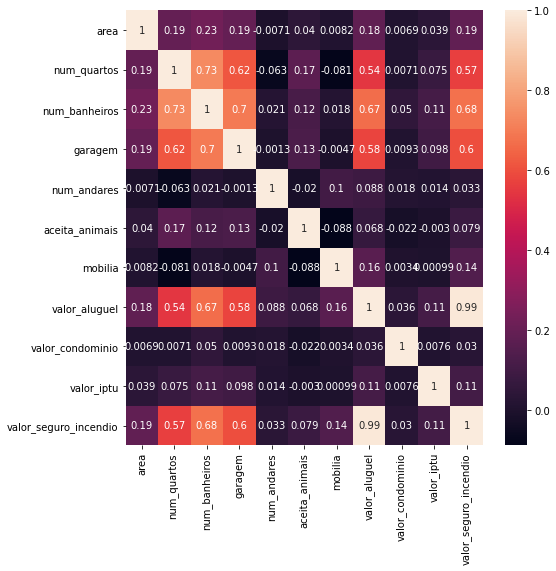

In [8]:
plt.figure(figsize =(8,8))
cor = data.corr()
sns.heatmap(cor,annot =True)

Visualizando as correlações em pares

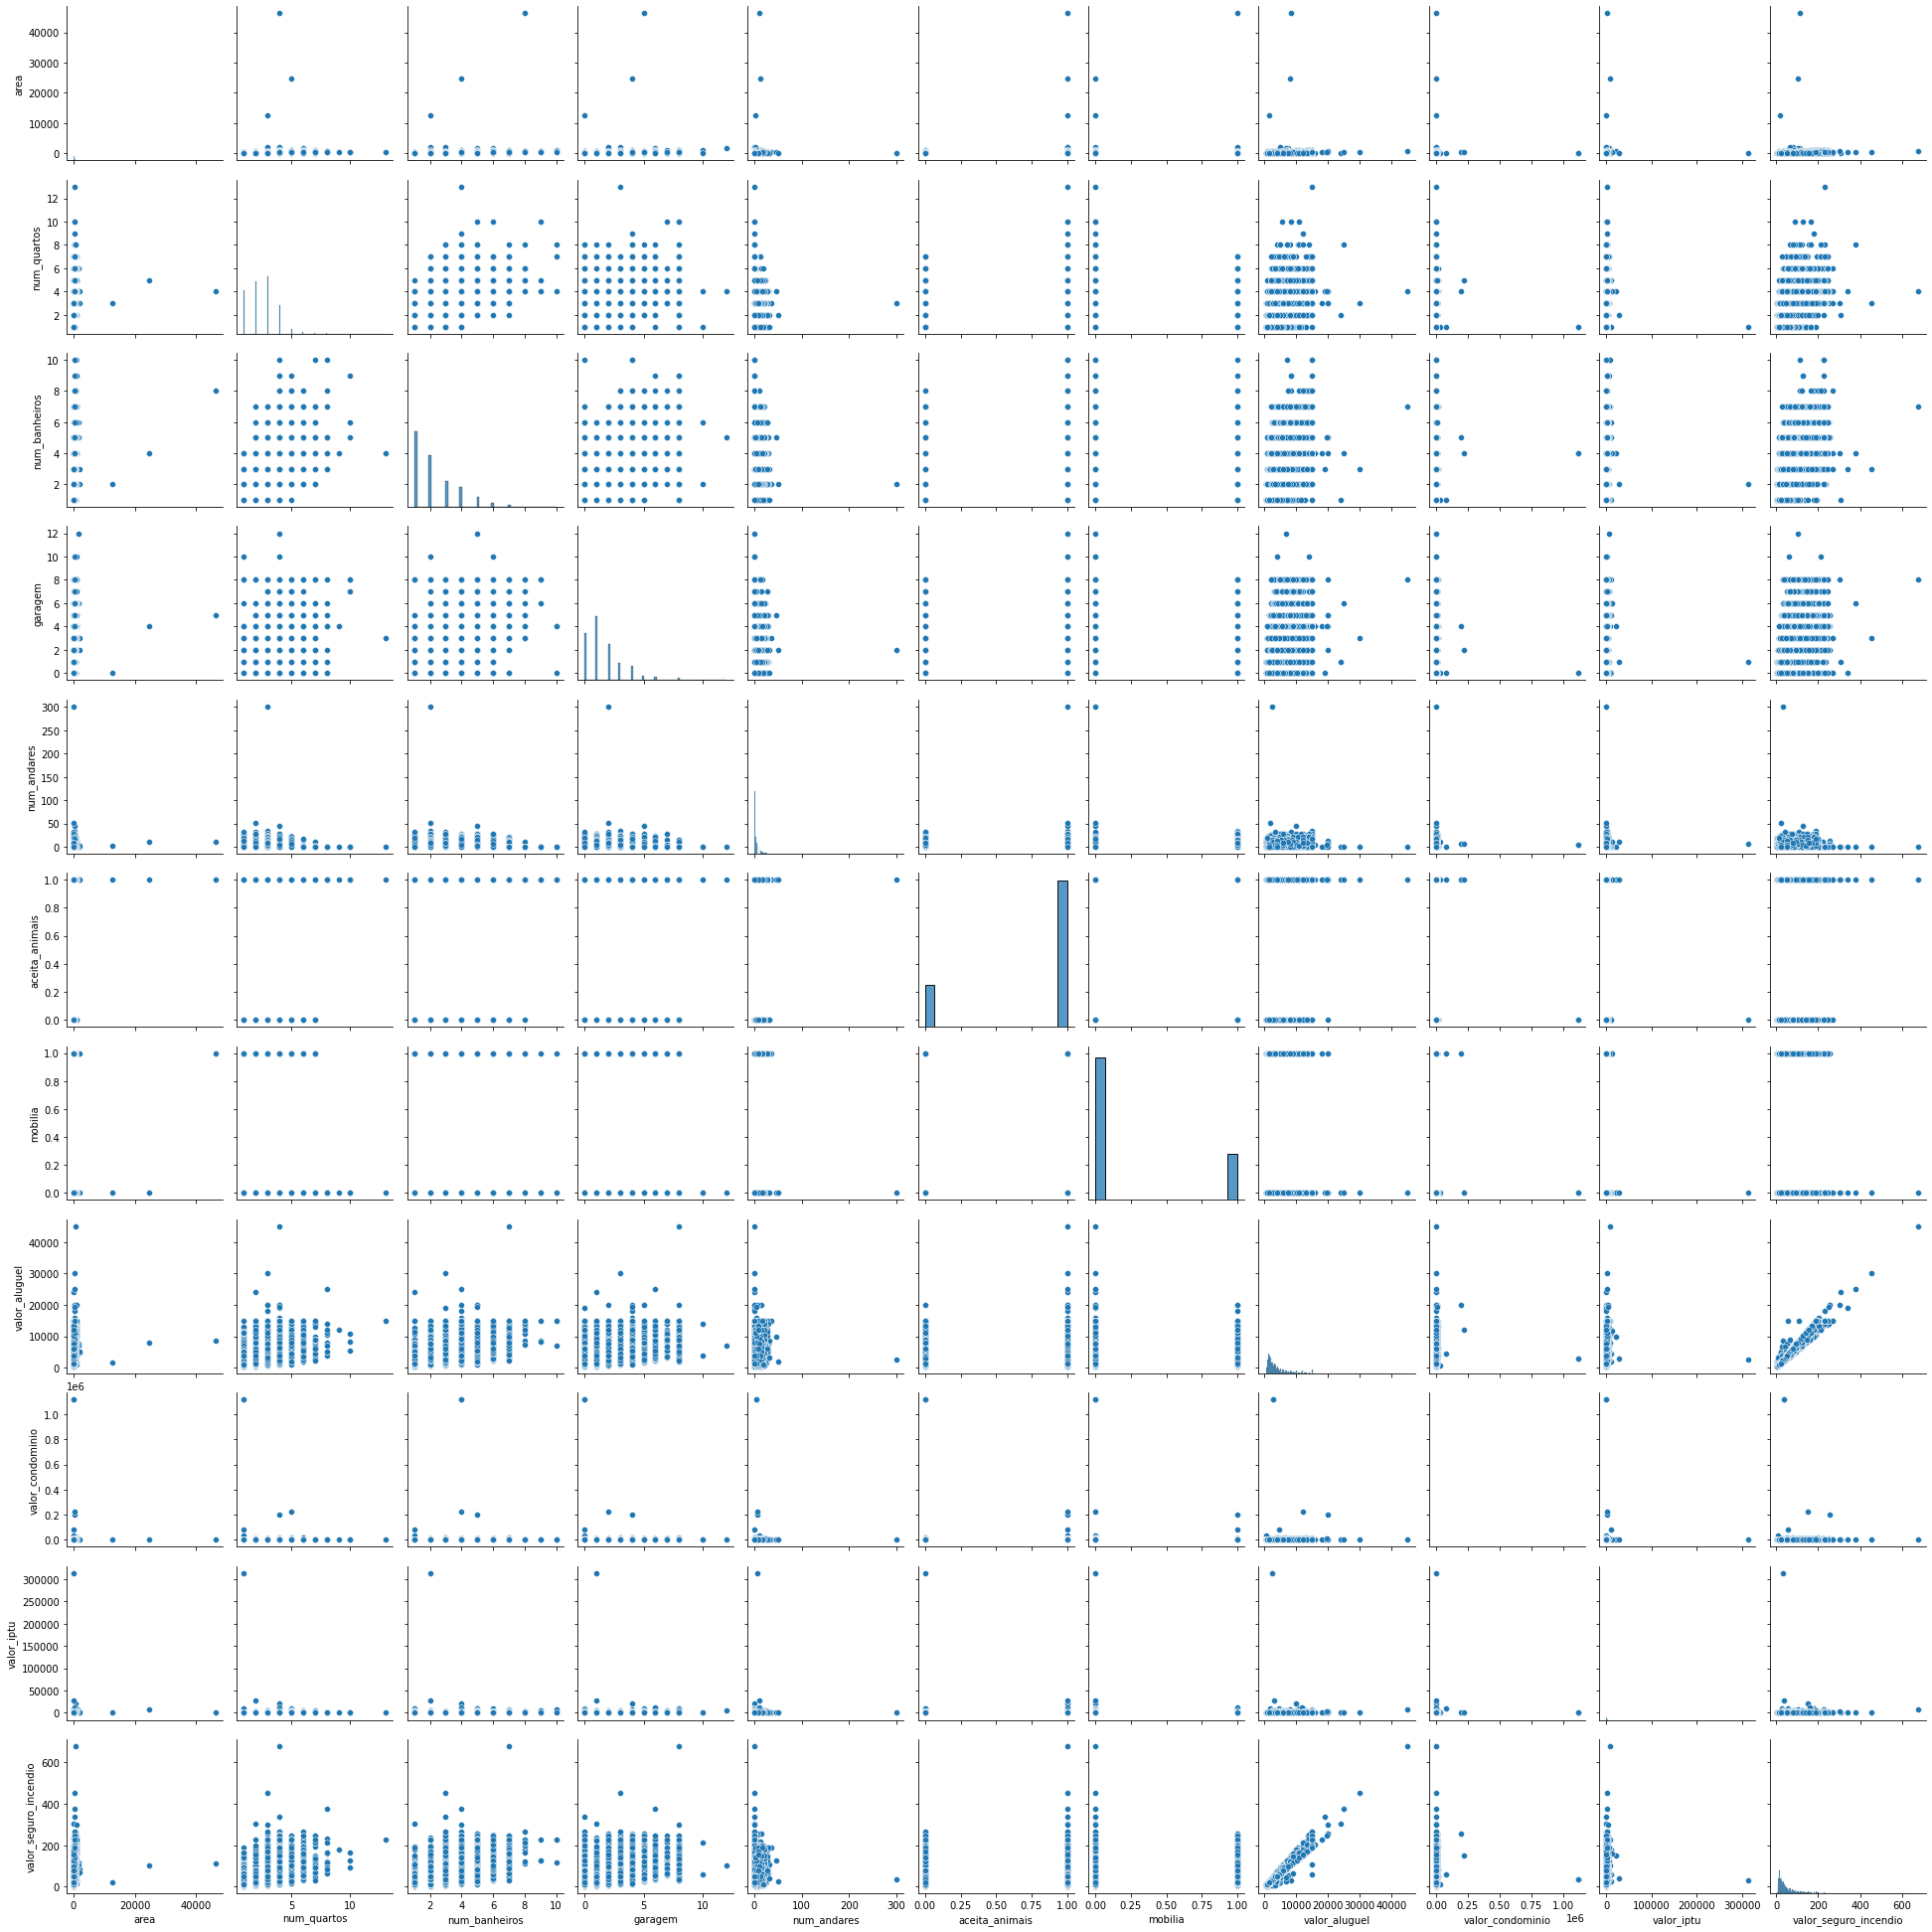

In [9]:
sns.pairplot(data)

'!' permite que você utilize comandos de nivel do sistema operacional

### Gerar Gráficos sweetviz

no exemplo abaixo gera um gráfico mostrando a relação do valor do aluguel com os outros atriutos.

In [10]:
my_report = sv.analyze(data,"valor_aluguel")
#abrir no navegador
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



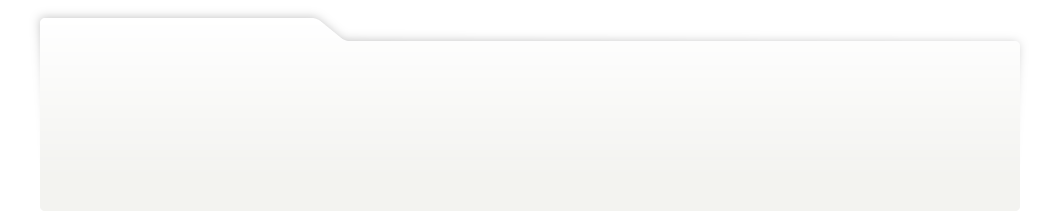
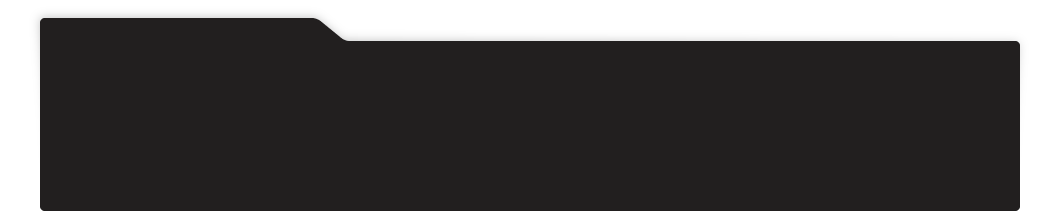
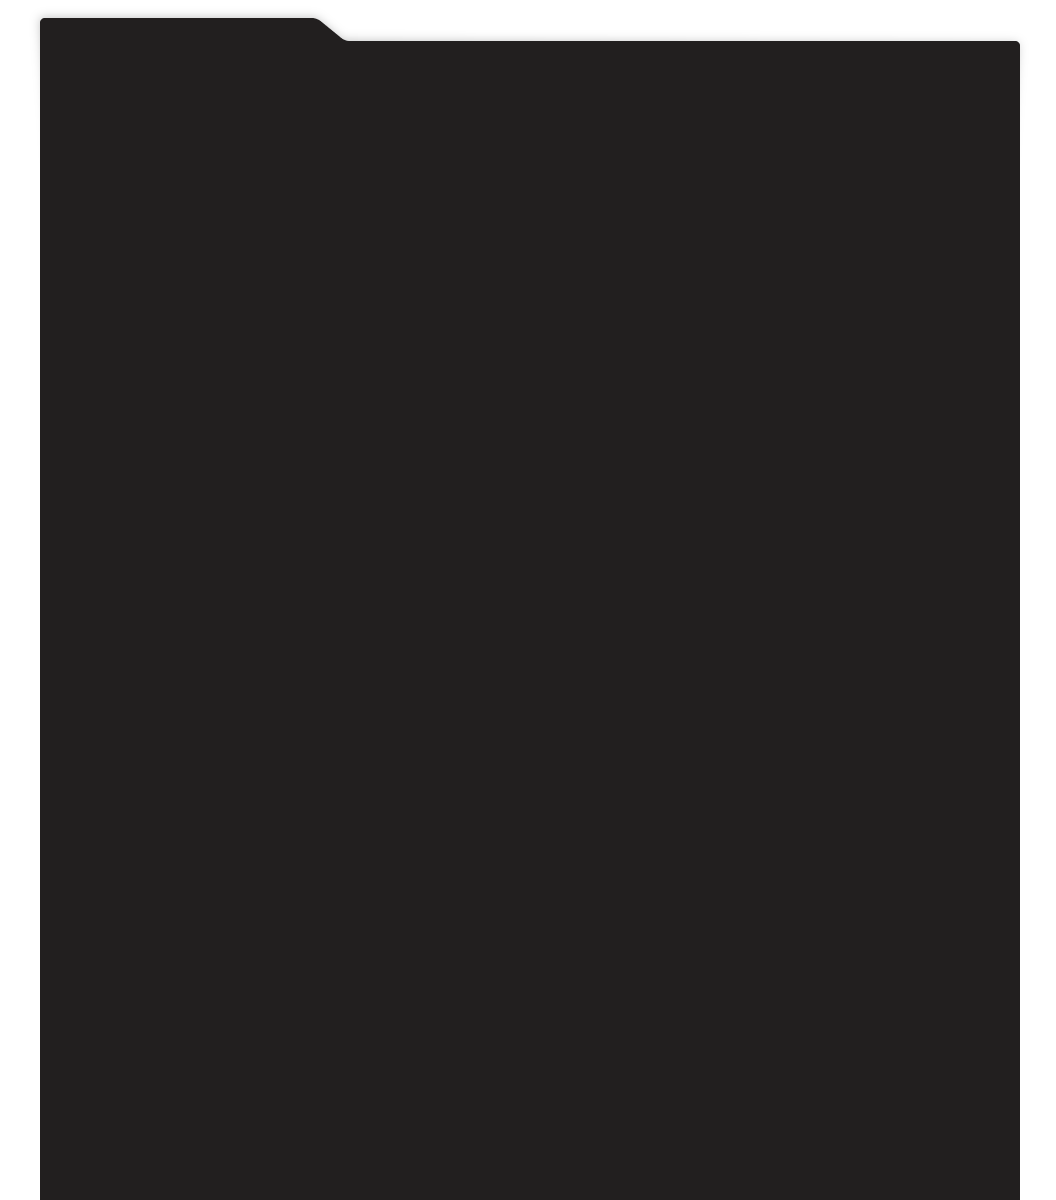
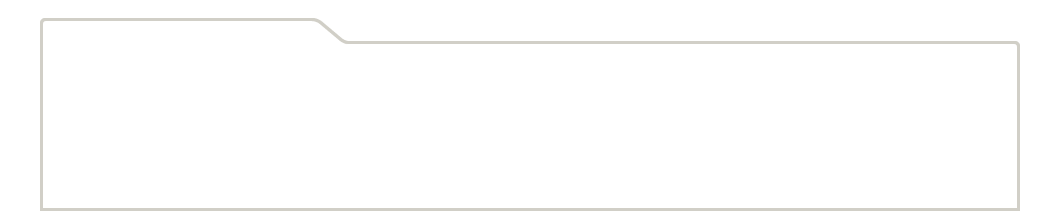
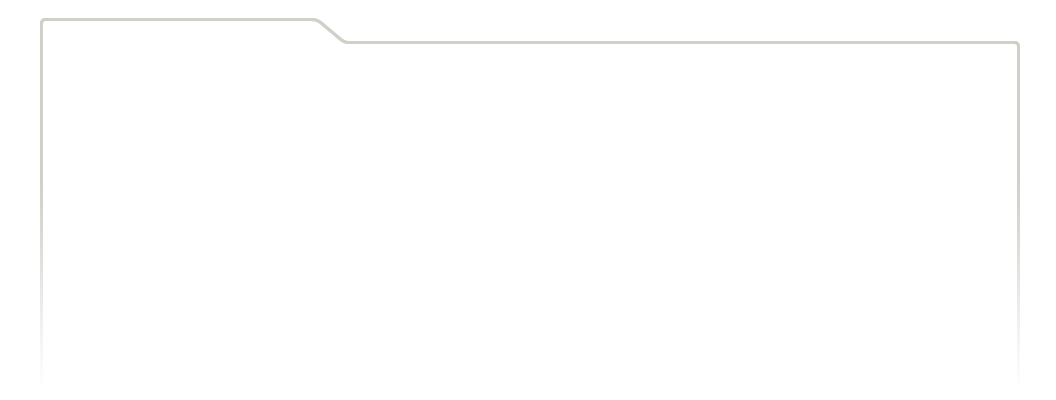
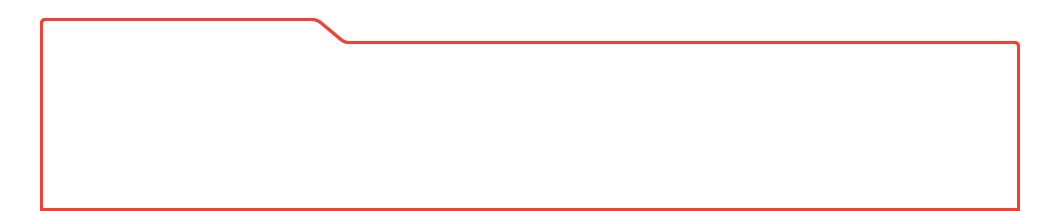
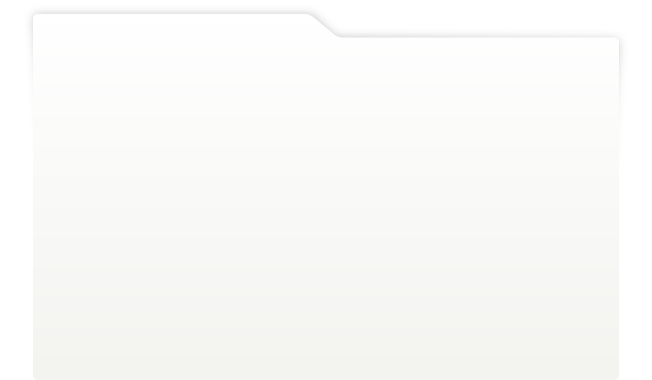
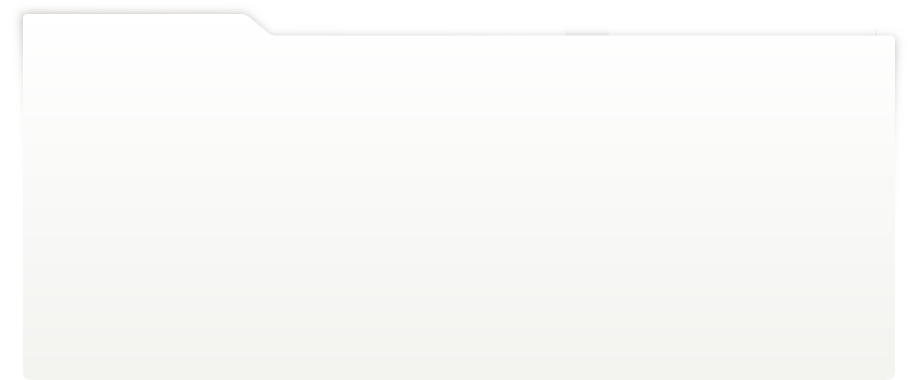
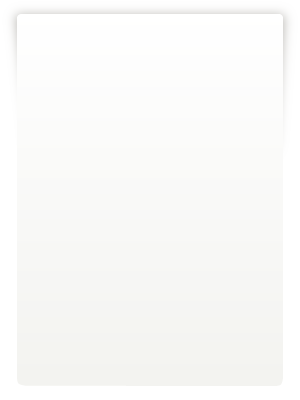
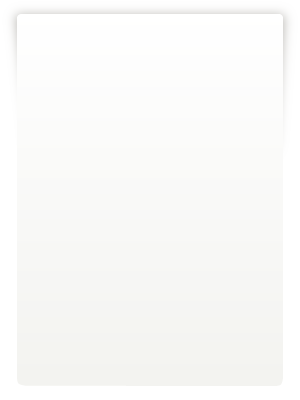
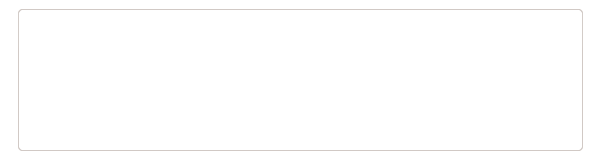
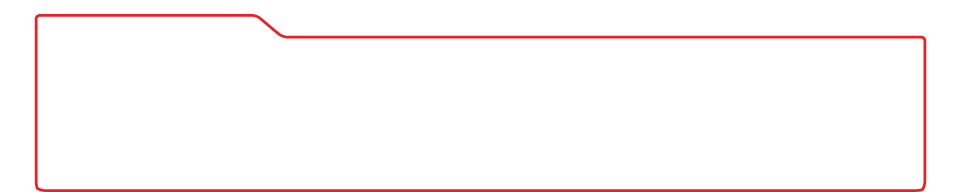
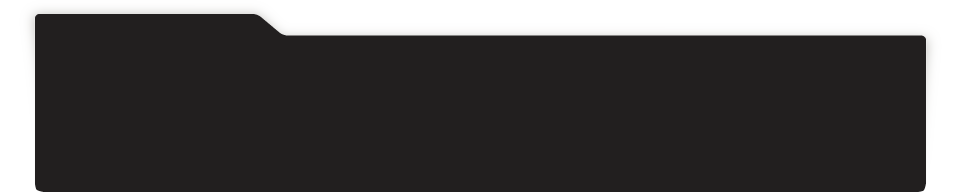
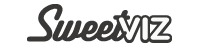
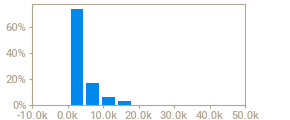
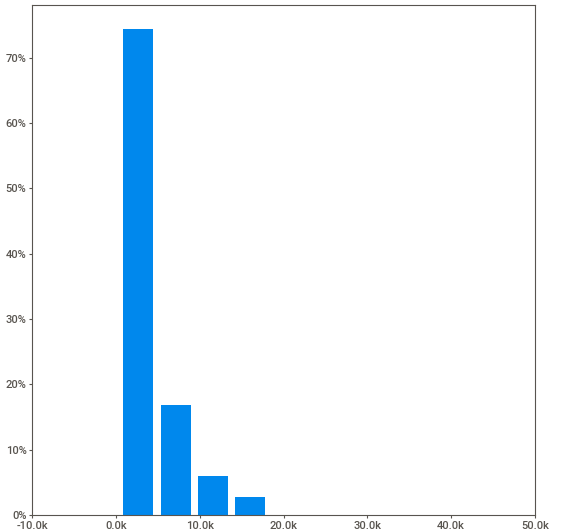
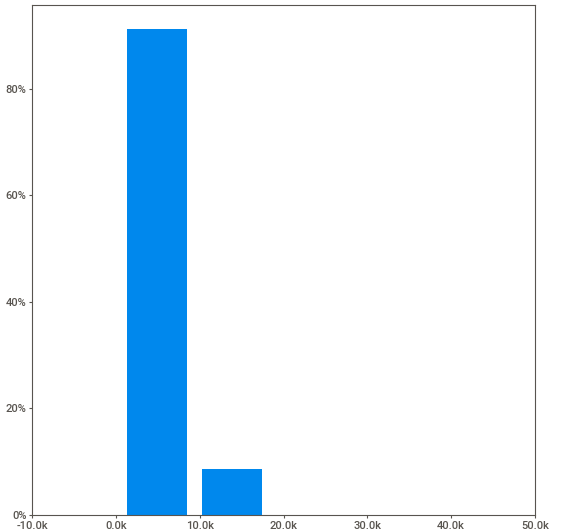
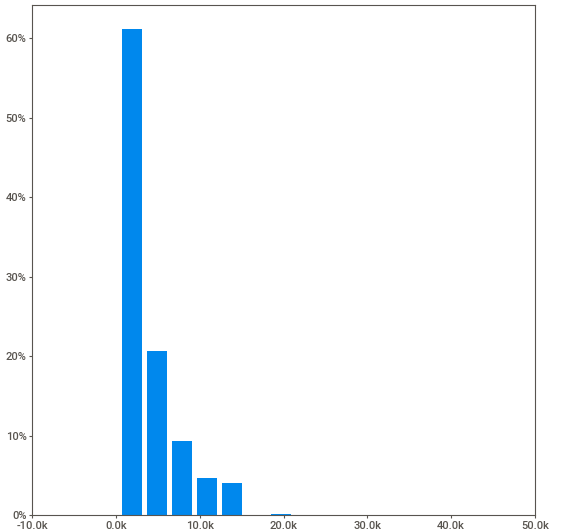
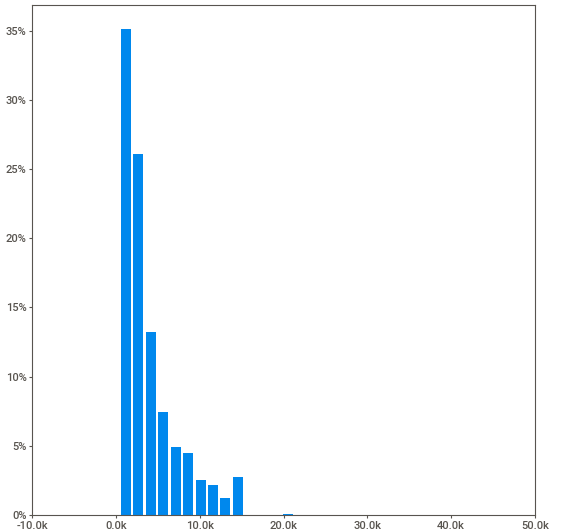
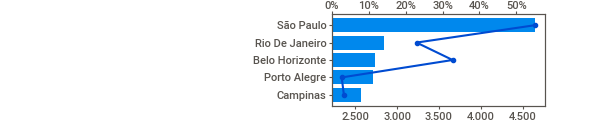
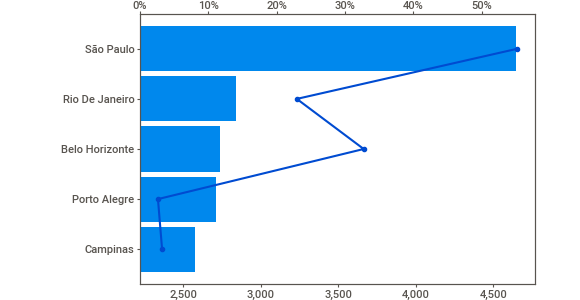
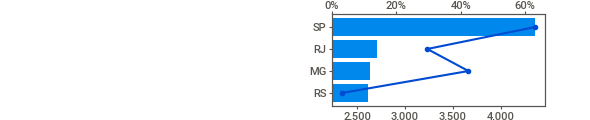
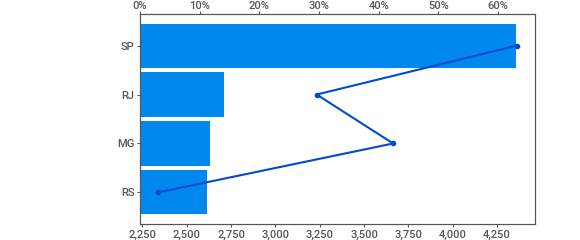
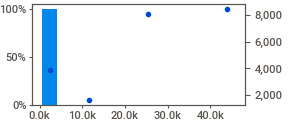
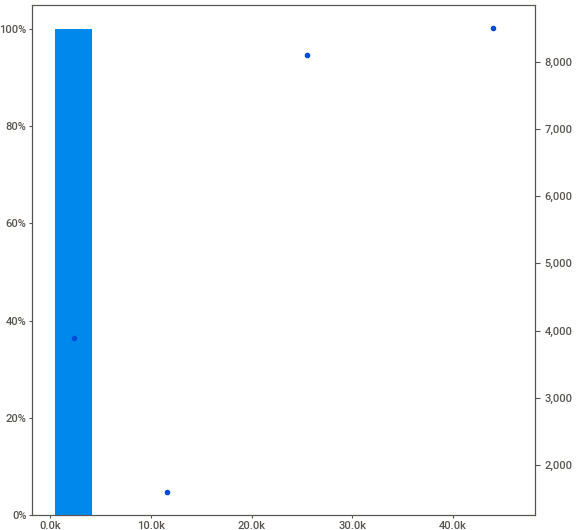
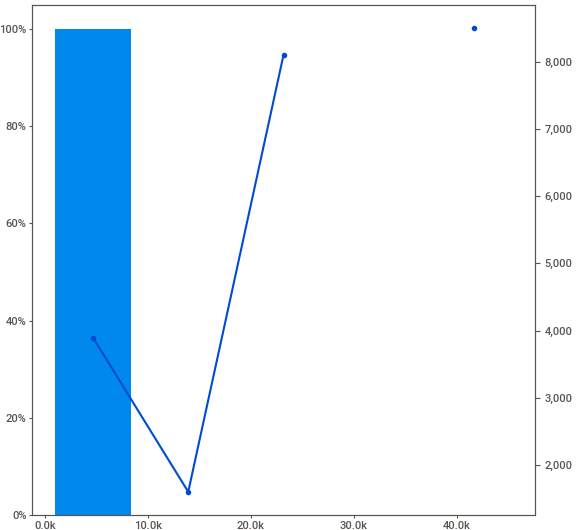
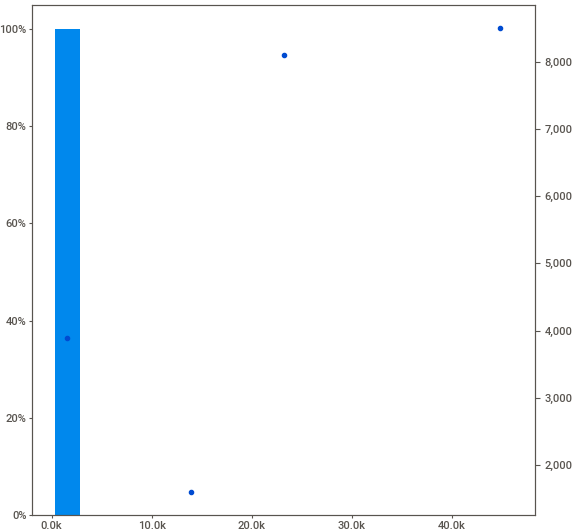
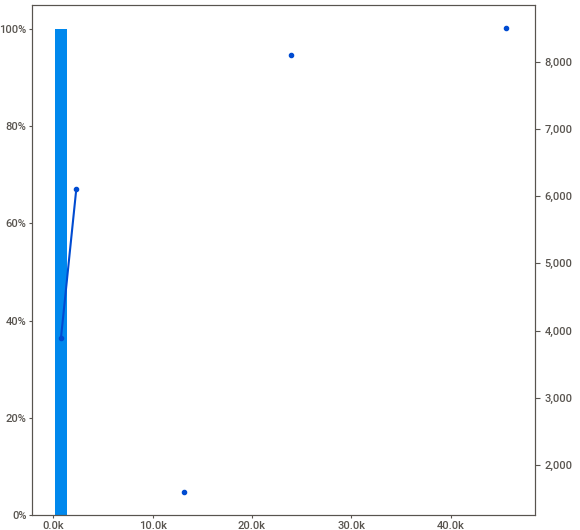
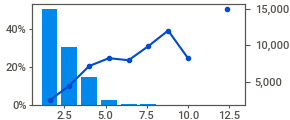
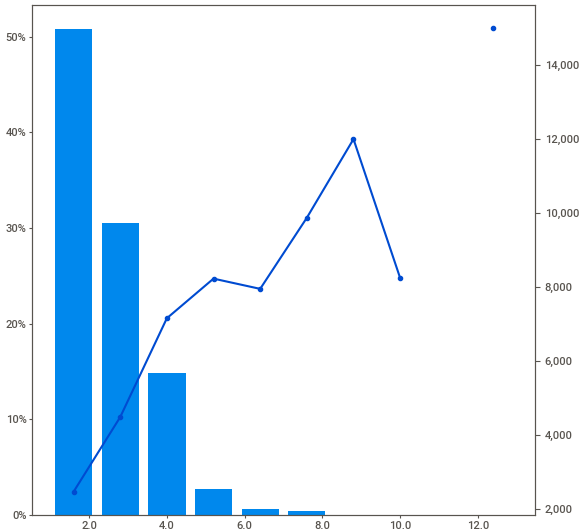
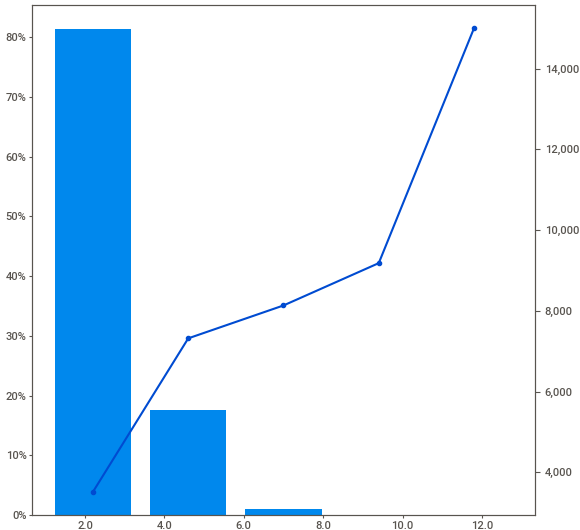
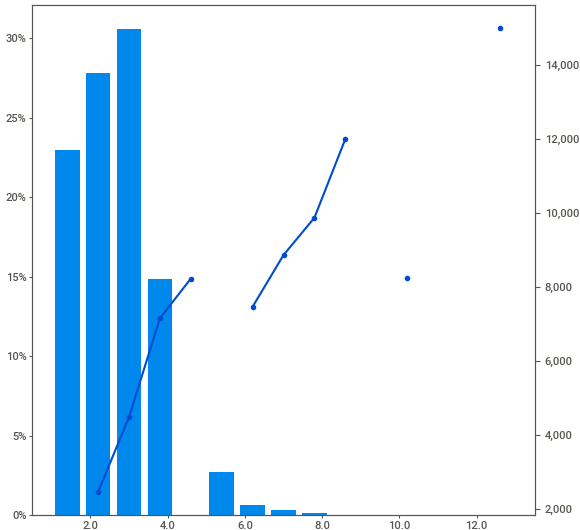
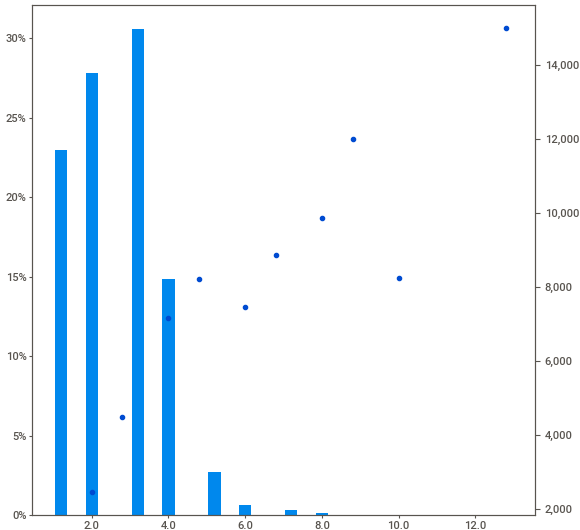
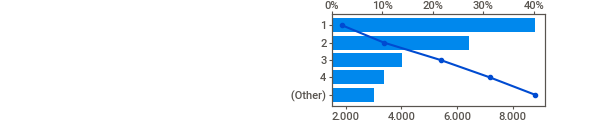
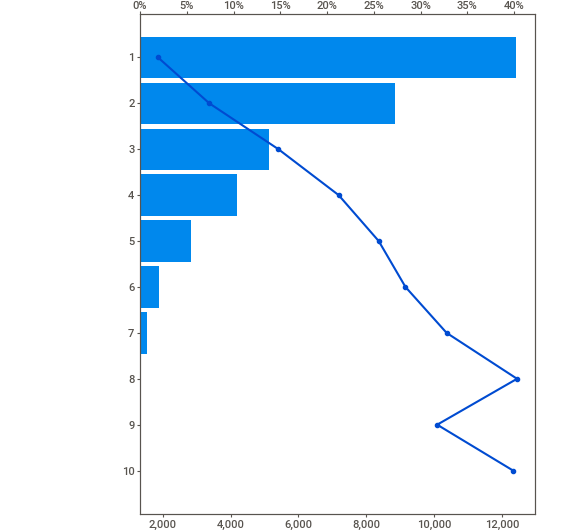
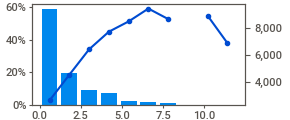
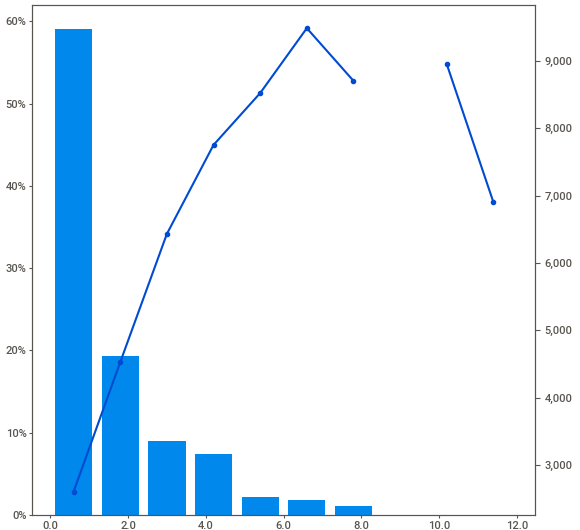
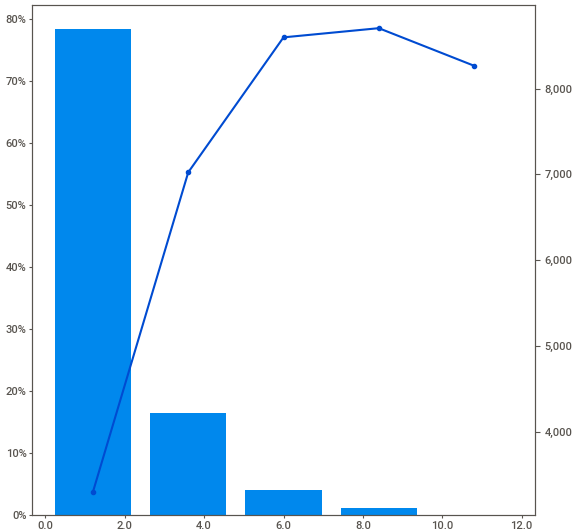
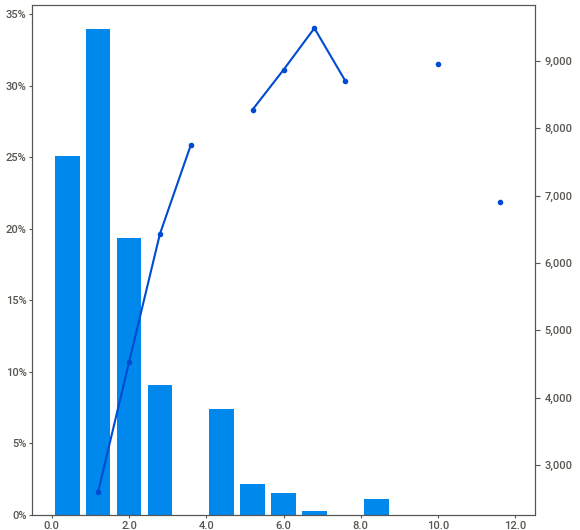
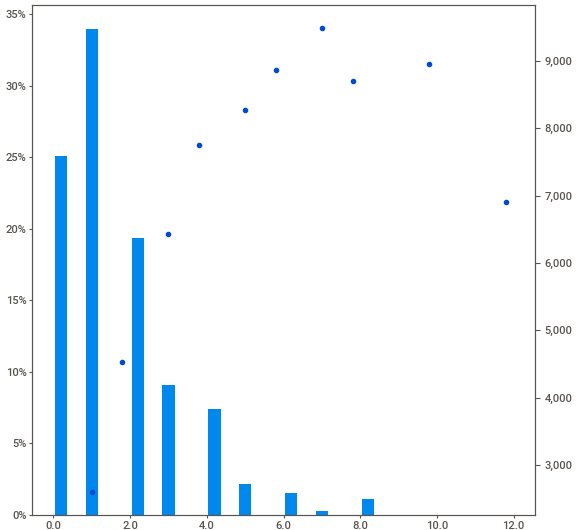
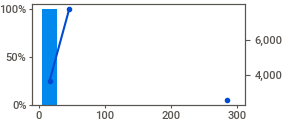
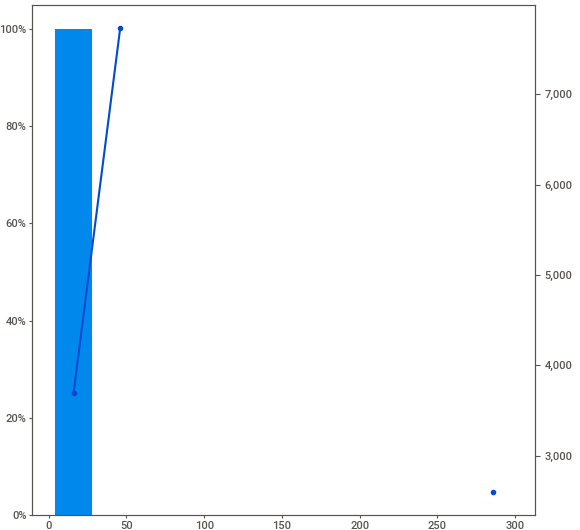
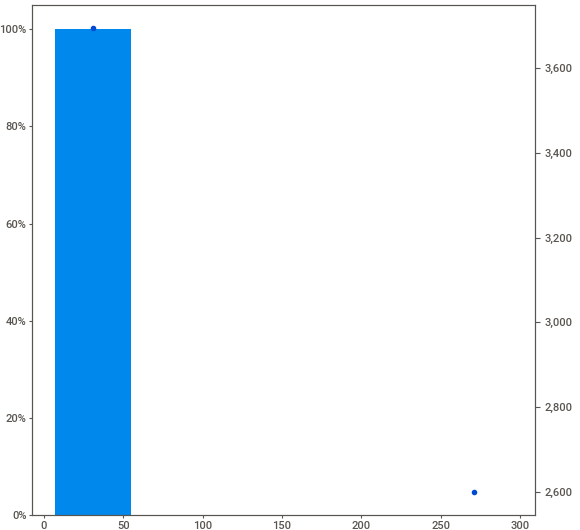
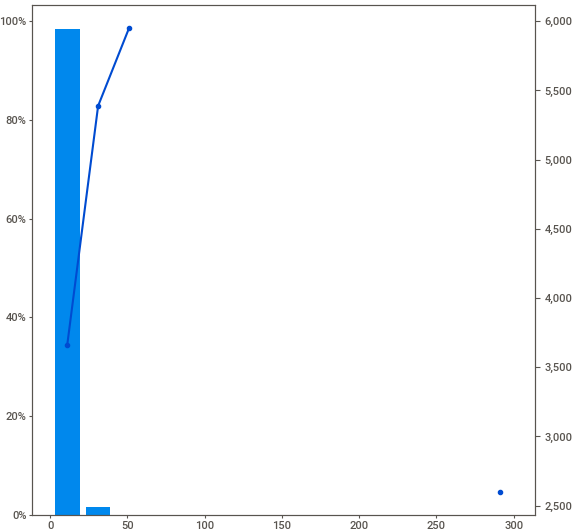
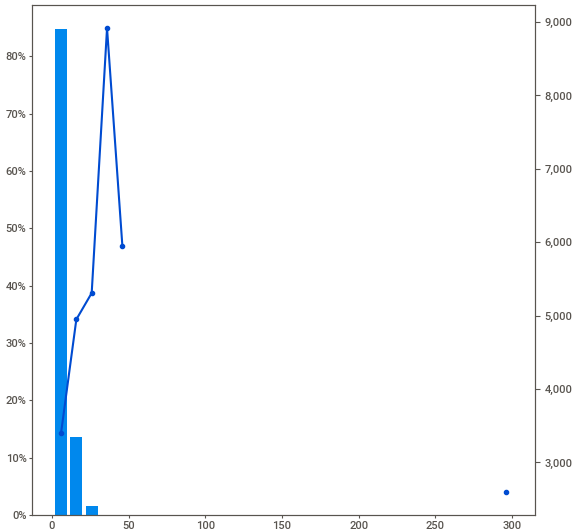
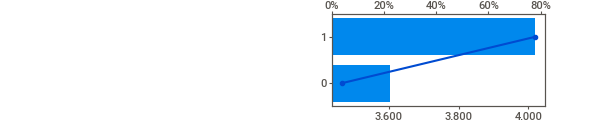
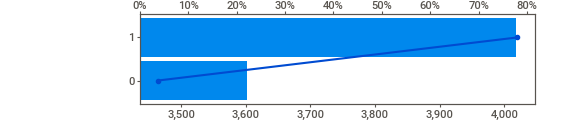
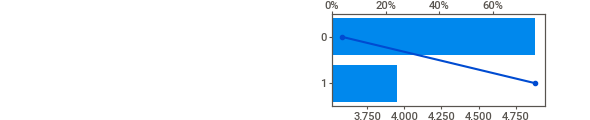
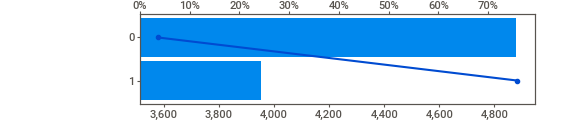
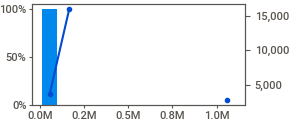
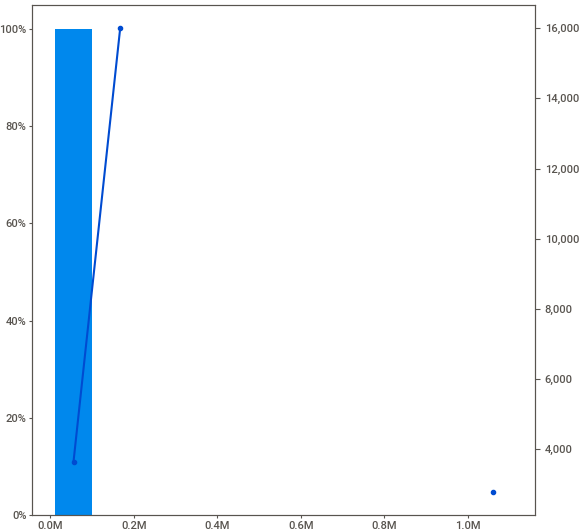
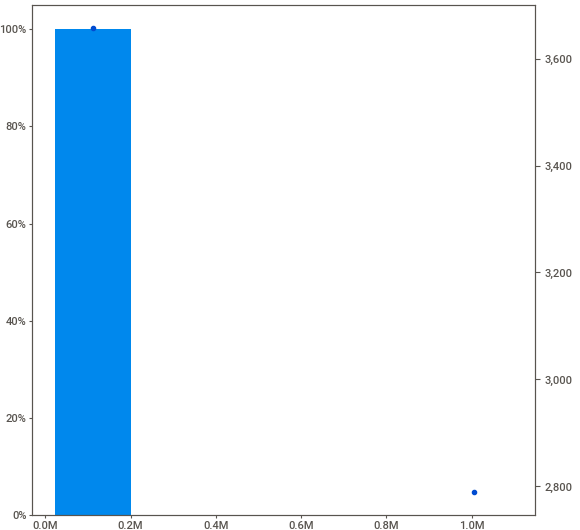
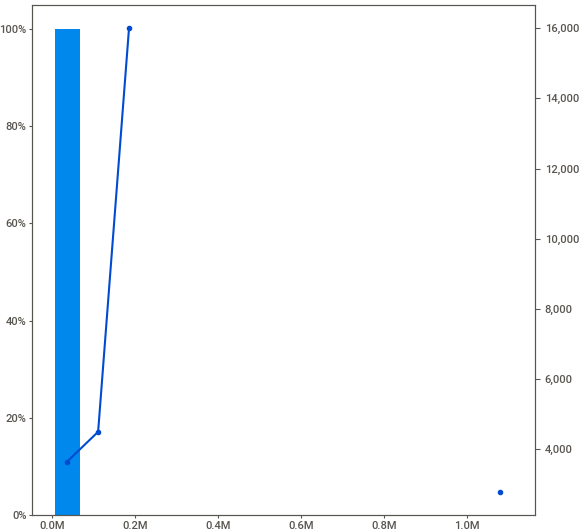
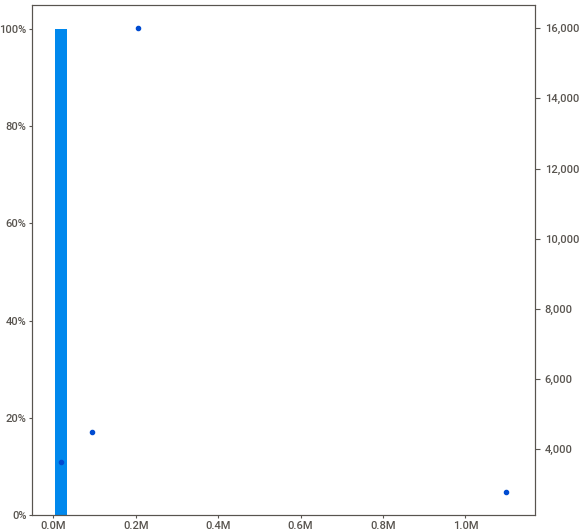
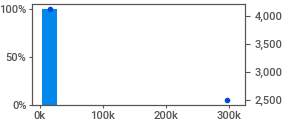
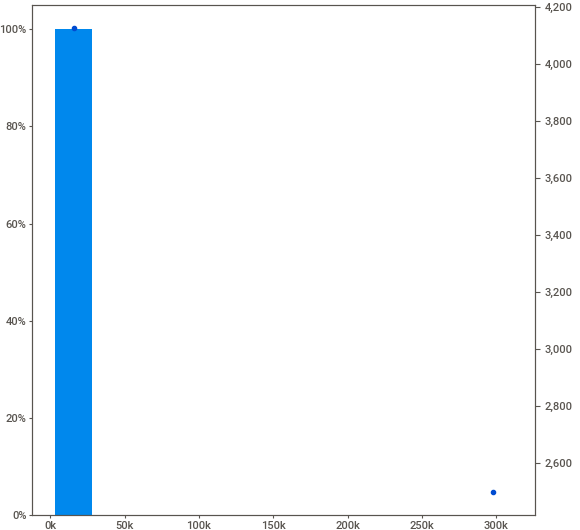
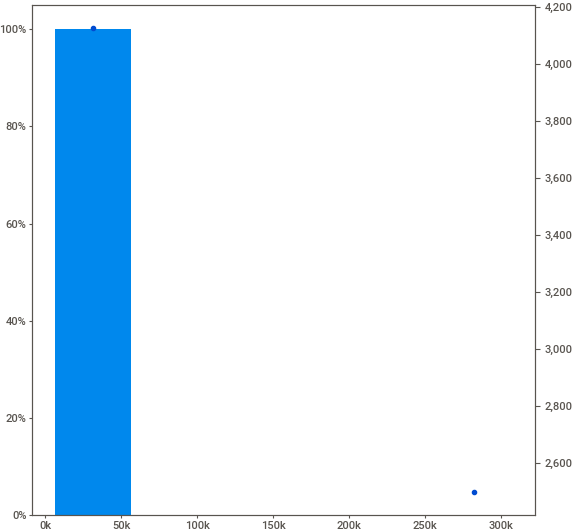
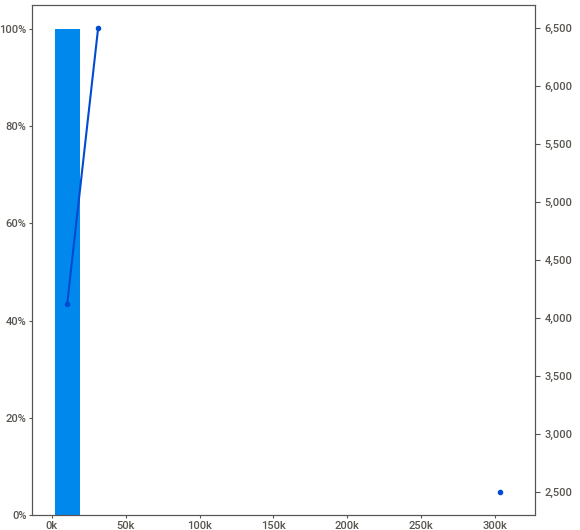
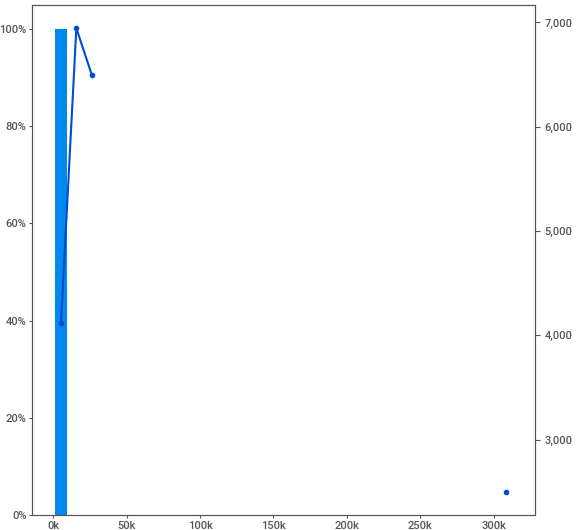
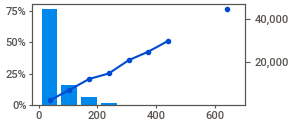
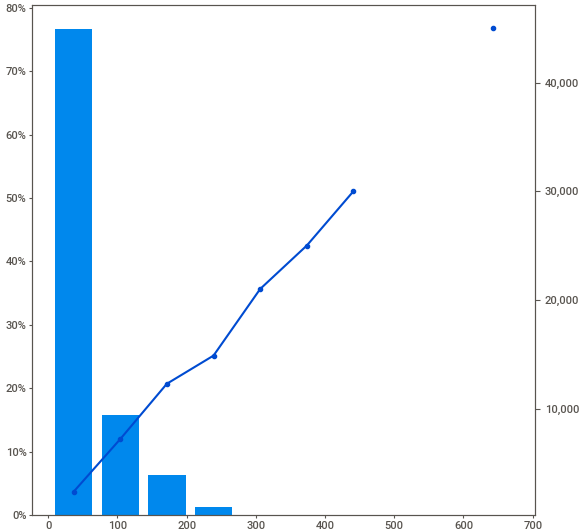
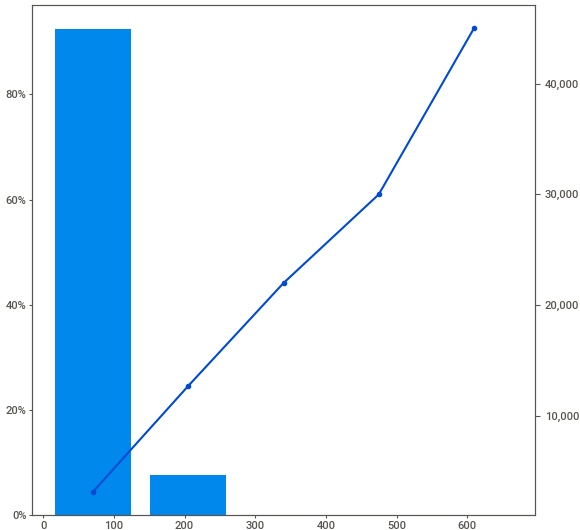
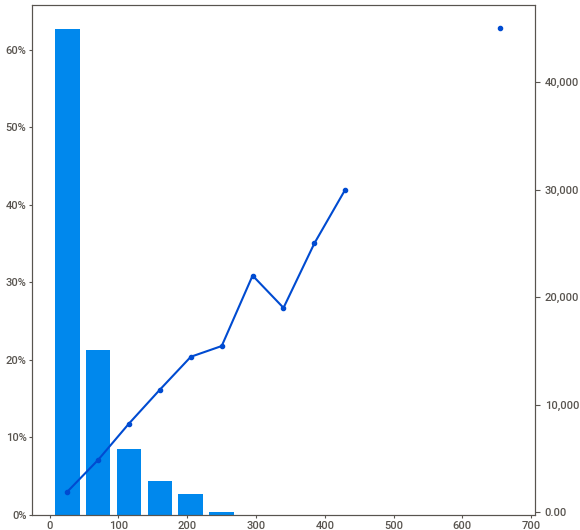
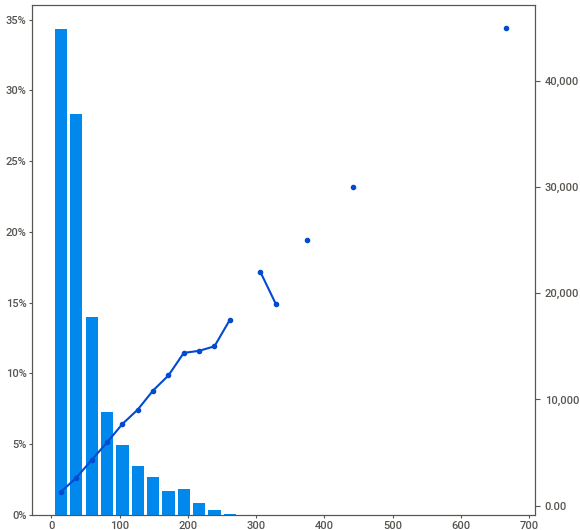
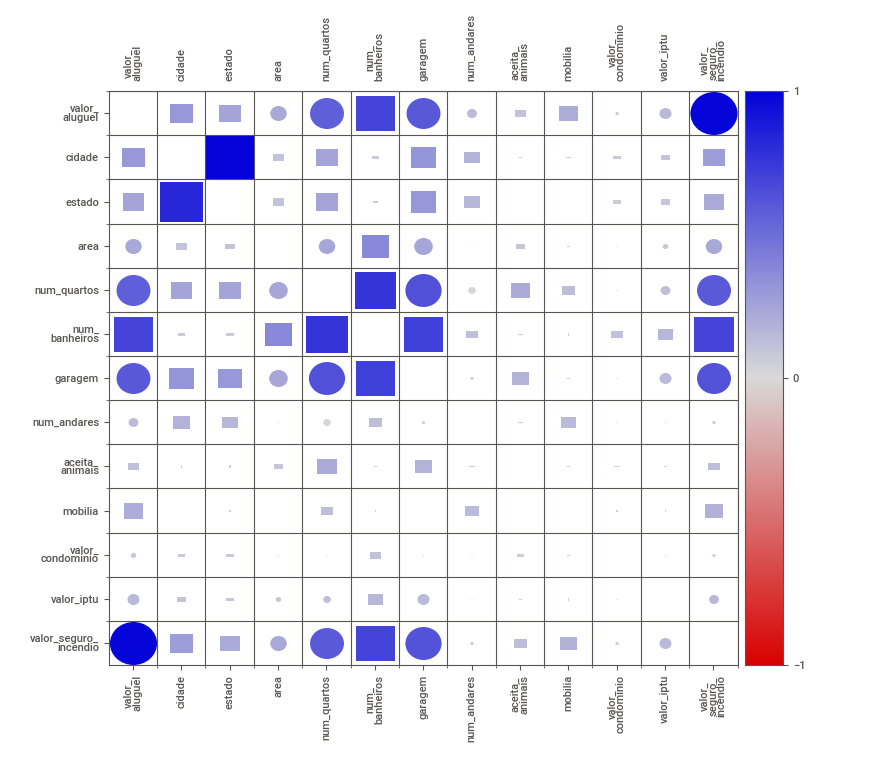
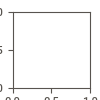

In [11]:
# abrir no nooebook
my_report.show_notebook()

# Como os valores de aluguel estão distribuidos?

### Intalando o plotly para visualizações dinamicas

O gráfico abaixo exibe como está distribuido o valor do aluguel de acordo com os imóveis 

In [12]:
fig = px.histogram(data, x="valor_aluguel", marginal="rug", hover_data=data.columns)
fig.show()


o gráfico a baixo mostra a dispersão dos dados referente ao valor do aluguel.

In [13]:
fig = px.box(data, x="valor_aluguel", points="all")
fig.show()

Alguns insigths identificados...<br/>
1. Dados com uma assimetria positiva. <br/>
2. Possíveis outliers acima de 15.000,00. <br/>
3. A maioria dos valores estão na faixa de R$ 499 à 10.000,00.

<AxesSubplot:xlabel='valor_aluguel'>

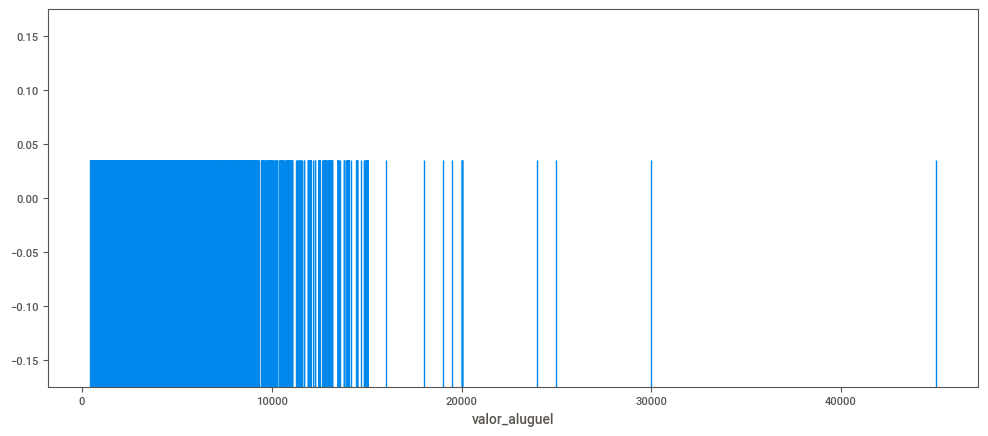

In [14]:
plt.figure(figsize =(12,5))
sns.rugplot(
            data['valor_aluguel'],
            height=0.6,    
            )

# Existe qualquer relação entre o número de quartos e o valor do aluguel?

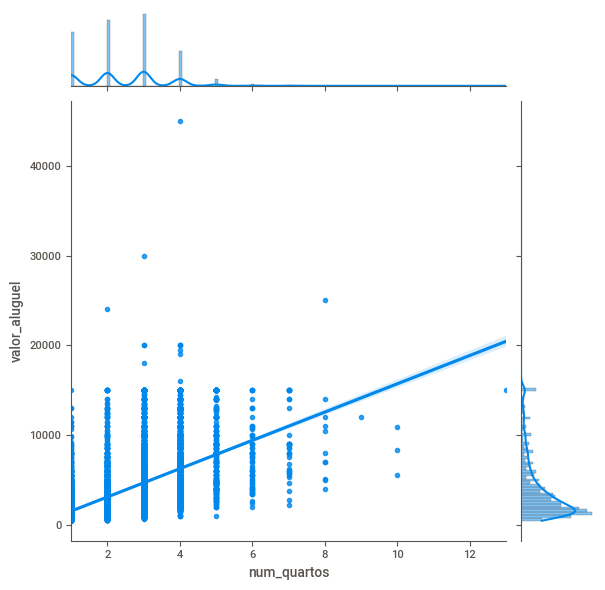

In [15]:
sns.jointplot(y= data['valor_aluguel'],x = data['num_quartos'],kind ='reg')

* Podemos observar que o número de quartos influencia no valor do aluguel.
* Os maiores imoveis mais caros são com números de quartos 3 e 4.
* Como uma regra geral temos uma relação positiva entre o número de imóveis e o valor do aluguel.

# O que podemos observar sobre a possibilidade de aceitar animais?

<AxesSubplot:xlabel='aceita_animais', ylabel='count'>

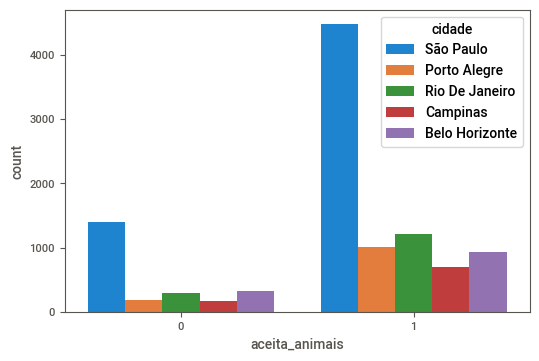

In [16]:
sns.countplot(x = data['aceita_animais']
              ,hue = data['cidade'])

In [17]:
data.head()

cidade estado  area  num_quartos  num_banheiros  garagem  \
0     São Paulo     SP    70            2              1        1   
1     São Paulo     SP   320            4              4        0   
2  Porto Alegre     RS    80            1              1        1   
3  Porto Alegre     RS    51            2              1        0   
4     São Paulo     SP    25            1              1        0   

   num_andares  aceita_animais  mobilia  valor_aluguel  valor_condominio  \
0            7               1        1           3300              2065   
1           20               1        0           4960              1200   
2            6               1        0           2800              1000   
3            2               1        0           1112               270   
4            1               0        0            800                 0   

   valor_iptu  valor_seguro_incendio  
0         211                     42  
1        1750                     63  
2           0                     41  
3          22                     17  
4          25                     11

* Podemos observar que o número de imóveis que aceitam animais é bem maior do que os que não aceitam.

In [18]:
data["animal_categorical"] =  data['aceita_animais'].map({1:"aceita",0:"nao_aceita"})

<AxesSubplot:xlabel='valor_aluguel', ylabel='animal_categorical'>

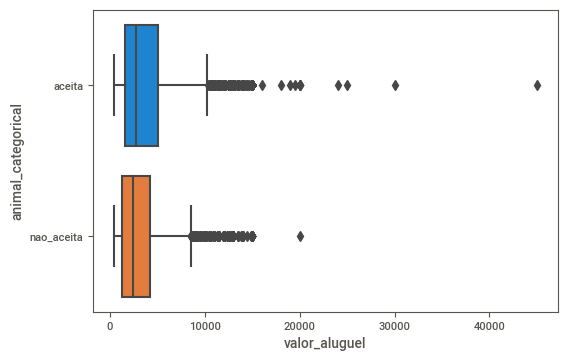

In [19]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['animal_categorical'])

* A maioria dos imóveis que aceitam animais, custam mais caros do que os que não aceitam.

# Cidades e os números de quartos

In [20]:
pd.DataFrame(data['cidade'].unique())

0
0       São Paulo
1    Porto Alegre
2  Rio De Janeiro
3        Campinas
4  Belo Horizonte

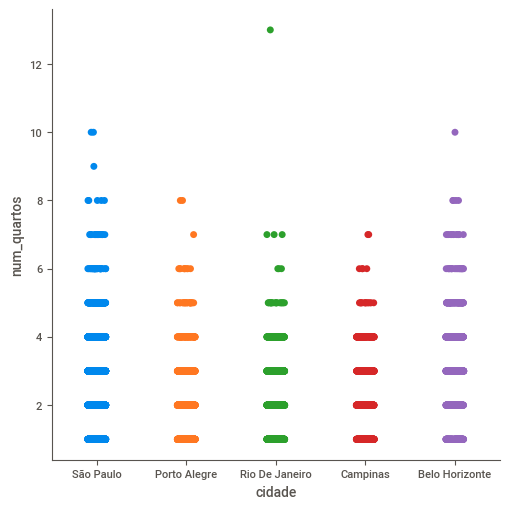

In [21]:
sns.catplot(x='cidade', y='num_quartos', data =data)

* Rio de Janeiro é a cidade com o maior número de quartos.

# Como estão distribuidos os imóveis por número de banheiros?

<AxesSubplot:xlabel='num_banheiros', ylabel='count'>

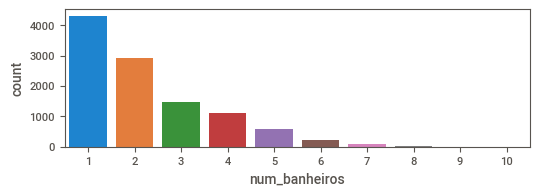

In [22]:
plt.subplot(2,1,1)
sns.countplot(x = data['num_banheiros'])

* A maioria dos imóveis contém de 1 a 2 banheiros.
* Existem poucos imóveis com 5 ou mais banheiros.

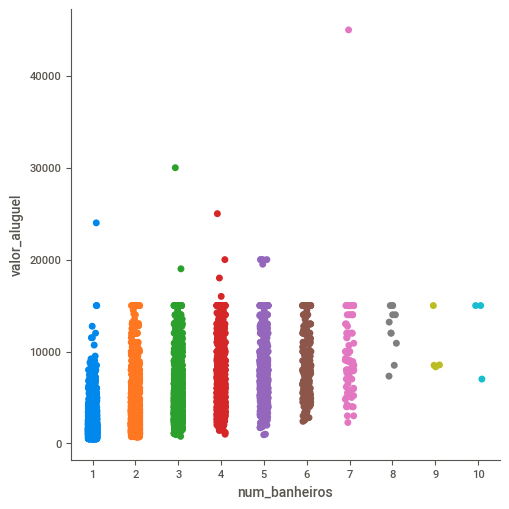

In [23]:
sns.catplot(x ='num_banheiros', y ='valor_aluguel', data = data)

* O maior aluguel é de um imóvel que tem 7 banheiros.
* Existem alugueis caros com imóveis com 1 a 4 banheiros.

# A mobília nos imoveis impactam no valor do aluguel?

In [24]:
data["mobilia_categorical"] =  data['mobilia'].map({1:"mobiliado",0:"nao_mobiliado"})

<AxesSubplot:xlabel='valor_aluguel', ylabel='mobilia_categorical'>

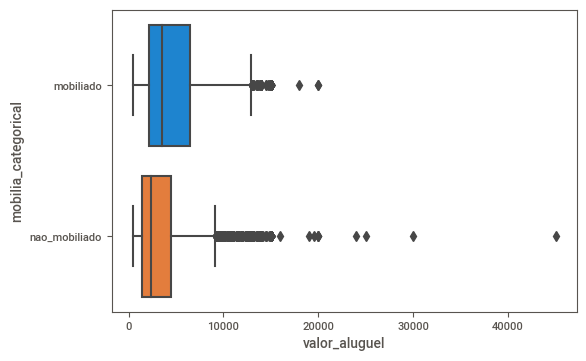

In [25]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['mobilia_categorical'])

* De todos os imóveis com valores maiores de aluguel, bem acima da média, são todos não mobiliados.
* O que justifica uma fraca correlação entre os atributos.

# Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?

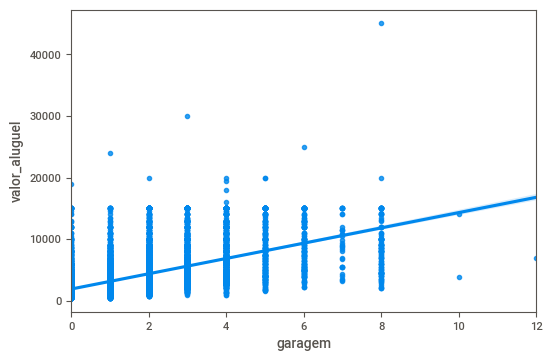

In [26]:
plt.figure(figsize =(6,4))
ax = sns.regplot(x = data['garagem'],y = data['valor_aluguel'])

<Figure size 600x400 with 0 Axes>

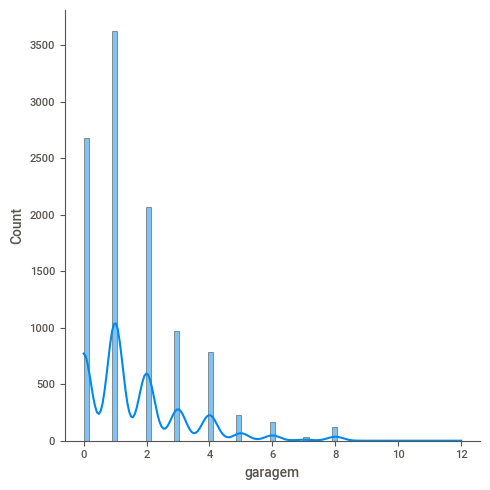

In [27]:
plt.figure(figsize =(6,4))
sns.displot(x = data['garagem'], kde = True)

Existe uma pequena correlação entre o número de vagas de garagem e o valor do aluguel.

# Vamos analisar o seguro incêndio

<AxesSubplot:xlabel='cidade', ylabel='valor_seguro_incendio'>

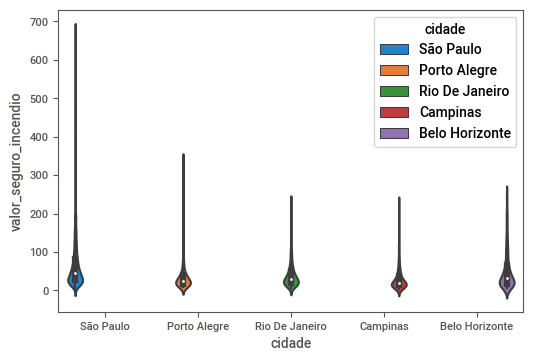

In [28]:
sns.violinplot(x ='cidade', y ='valor_seguro_incendio', data = data,hue ='cidade')

* São Paulo é a cidade com os maiores valores de seguro incêndio, seguido por Porto Alegre, Belo Horizonte, Rio de Janeiro e Campinas.

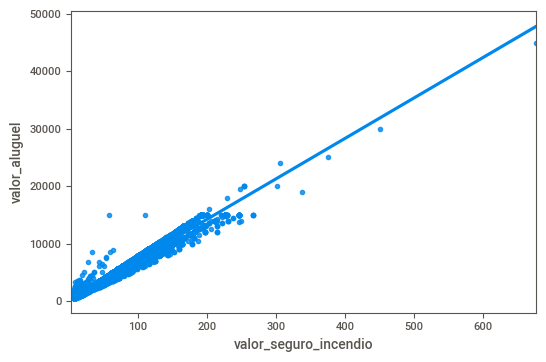

In [29]:
ax = sns.regplot(x = data['valor_seguro_incendio'],y = data['valor_aluguel'])

* Existe uma alta correlação entre o valor do seguro incendio e o valor do aluguel. 
* Quanto maior o valor do seguro incendio maior o valor do aluguel.

# Existe qualquer relação entre o valor do iptu e o valor do aluguel?

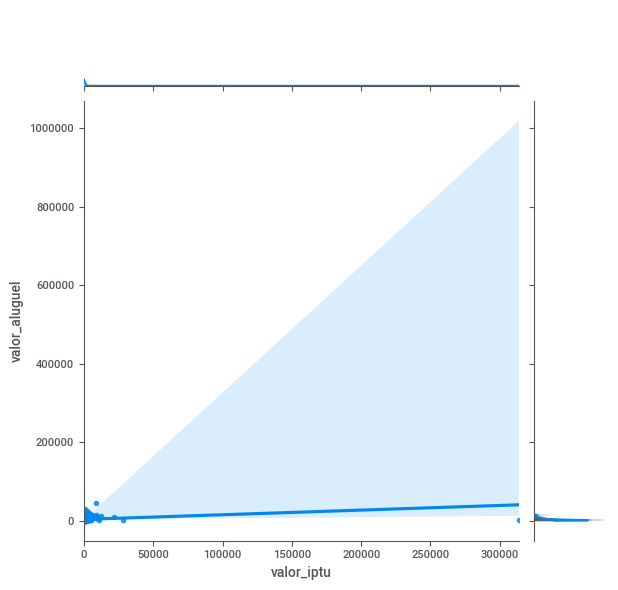

In [30]:
sns.jointplot(y= data['valor_aluguel'],x = data['valor_iptu'],kind ='reg')

* Não temos nenhum impacto

**Pré-processando os dados**

Poucos algoritmos trabalham com dados categóricos, por essas variáveis serem importantes para o nosso modelo precisamos transformar dados categóricos em dados numéricos para poder usar os algoritmos de Machine Learning

Podemos usar duas técnicas bem eficientes que são:

- **Label Encoder**

Basicamente ele substitui a informação por um valor numérico, o grande problema é que os modelos de IA interpretam esses dados em uma ordem (0<1<2) dando um peso maior para o dado categorico representado por um valor maior.

exemplo:

são paulo -> 1
Rio de Janeiro -> 2

Rio de janeiro tem um peso maior que são paulo.


- **One Hot Enconder**

este processo resolve o problema anterio. porém aumenta o tamanho da base de dados, o que o torna difícil de gerenciar para base de dados com grandes quantidades de dados categoricos distintos.

Este método transforma os dados categoricos em colunas e atribuir o valor 1 ou 0 (verdadeiro ou falso). 

exemplo:

é gerado uma colunas chamada São Paulo e todos os dados que correspondem a cidade de São Paulo será atribuído 1, os que não corresponde com São Paulo é atribuído 0.

- Links + info

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

Verificando a quantidade de valores únicos na coluna estado

In [31]:
data.estado.unique()

array(['SP', 'RS', 'RJ', 'MG'], dtype=object)

Verificando a quantidade de valores únicos na coluna cidade

In [32]:
data.cidade.unique()

array(['São Paulo', 'Porto Alegre', 'Rio De Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

**Aplicando o One Hot Encoder**

Subistituindo o dataframe data pelo dataframe após aplicado o get_dummies()

In [33]:
# get_dummies transforma os dados da coluna aplicando o one hot enconder
data = pd.get_dummies(data, columns=["estado","cidade"], prefix=["estado_","cidade_"])

In [34]:
data.head()

area  num_quartos  num_banheiros  garagem  num_andares  aceita_animais  \
0    70            2              1        1            7               1   
1   320            4              4        0           20               1   
2    80            1              1        1            6               1   
3    51            2              1        0            2               1   
4    25            1              1        0            1               0   

   mobilia  valor_aluguel  valor_condominio  valor_iptu  \
0        1           3300              2065         211   
1        0           4960              1200        1750   
2        0           2800              1000           0   
3        0           1112               270          22   
4        0            800                 0          25   

   valor_seguro_incendio animal_categorical mobilia_categorical  estado__MG  \
0                     42             aceita           mobiliado           0   
1                     63             aceita       nao_mobiliado           0   
2                     41             aceita       nao_mobiliado           0   
3                     17             aceita       nao_mobiliado           0   
4                     11         nao_aceita       nao_mobiliado           0   

   estado__RJ  estado__RS  estado__SP  cidade__Belo Horizonte  \
0           0           0           1                       0   
1           0           0           1                       0   
2           0           1           0                       0   
3           0           1           0                       0   
4           0           0           1                       0   

   cidade__Campinas  cidade__Porto Alegre  cidade__Rio De Janeiro  \
0                 0                     0                       0   
1                 0                     0                       0   
2                 0                     1                       0   
3                 0                     1                       0   
4                 0                     0                       0   

   cidade__São Paulo  
0                  1  
1                  1  
2                  0  
3                  0  
4                  1

In [35]:
data.columns

Index(['area', 'num_quartos', 'num_banheiros', 'garagem', 'num_andares',
       'aceita_animais', 'mobilia', 'valor_aluguel', 'valor_condominio',
       'valor_iptu', 'valor_seguro_incendio', 'animal_categorical',
       'mobilia_categorical', 'estado__MG', 'estado__RJ', 'estado__RS',
       'estado__SP', 'cidade__Belo Horizonte', 'cidade__Campinas',
       'cidade__Porto Alegre', 'cidade__Rio De Janeiro', 'cidade__São Paulo'],
      dtype='object')

# Detecção de Outliers, Machine Learning

Excluindo os atributos categoricos

In [36]:
data.drop(["animal_categorical","mobilia_categorical"], axis=1, inplace=True)

### Outlier Detection

Consiste em detectar valores possivelmente anomálos na nossa base de dados.

Utilizaremos do intervalo interquartil para detectar outliers.

#### Intervalo interquartil (FIQ)

Consiste na quantidade de dispersão no meio.

FiQ = Q3 - Q1

#### Detectando outlier com FIQ

- outlier baixo:

Q1 - (1.5 x FIQ)

- outlier Alto:

Q3 + (1.5 x FiQ)

- Links:

https://pt.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/interquartile-range-iqr/a/interquartile-range-review

https://pt.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule

Verificando os registros anomalos no atributo valor_aluguel

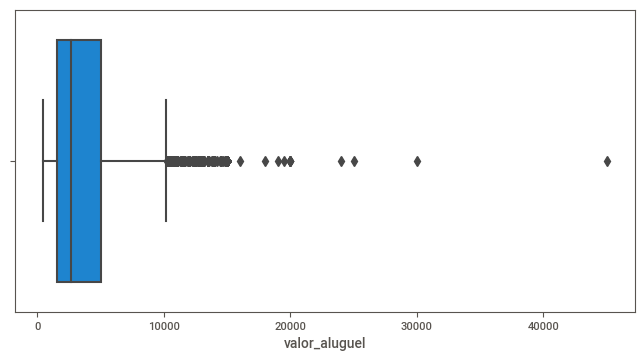

In [37]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['valor_aluguel'])
plt.show()

In [38]:
data.describe()

area   num_quartos  num_banheiros       garagem   num_andares  \
count  10692.000000  10692.000000   10692.000000  10692.000000  10692.000000   
mean     149.217920      2.506079       2.236813      1.609147      5.298167   
std      537.016942      1.171266       1.407198      1.589521      5.888747   
min       11.000000      1.000000       1.000000      0.000000      1.000000   
25%       56.000000      2.000000       1.000000      0.000000      1.000000   
50%       90.000000      2.000000       2.000000      1.000000      3.000000   
75%      182.000000      3.000000       3.000000      2.000000      8.000000   
max    46335.000000     13.000000      10.000000     12.000000    301.000000   

       aceita_animais       mobilia  valor_aluguel  valor_condominio  \
count    10692.000000  10692.000000   10692.000000      1.069200e+04   
mean         0.777778      0.243734    3896.247194      1.174022e+03   
std          0.415759      0.429354    3408.545518      1.559231e+04   
min          0.000000      0.000000     450.000000      0.000000e+00   
25%          1.000000      0.000000    1530.000000      1.700000e+02   
50%          1.000000      0.000000    2661.000000      5.600000e+02   
75%          1.000000      0.000000    5000.000000      1.237500e+03   
max          1.000000      1.000000   45000.000000      1.117000e+06   

          valor_iptu  valor_seguro_incendio    estado__MG    estado__RJ  \
count   10692.000000           10692.000000  10692.000000  10692.000000   
mean      366.704358              53.300879      0.117658      0.140385   
std      3107.832321              47.768031      0.322218      0.347403   
min         0.000000               3.000000      0.000000      0.000000   
25%        38.000000              21.000000      0.000000      0.000000   
50%       125.000000              36.000000      0.000000      0.000000   
75%       375.000000              68.000000      0.000000      0.000000   
max    313700.000000             677.000000      1.000000      1.000000   

         estado__RS    estado__SP  cidade__Belo Horizonte  cidade__Campinas  \
count  10692.000000  10692.000000            10692.000000      10692.000000   
mean       0.111579      0.630378                0.117658          0.079779   
std        0.314862      0.482725                0.322218          0.270964   
min        0.000000      0.000000                0.000000          0.000000   
25%        0.000000      0.000000                0.000000          0.000000   
50%        0.000000      1.000000                0.000000          0.000000   
75%        0.000000      1.000000                0.000000          0.000000   
max        1.000000      1.000000                1.000000          1.000000   

       cidade__Porto Alegre  cidade__Rio De Janeiro  cidade__São Paulo  
count          10692.000000            10692.000000       10692.000000  
mean               0.111579                0.140385           0.550599  
std                0.314862                0.347403           0.497456  
min                0.000000                0.000000           0.000000  
25%                0.000000                0.000000           0.000000  
50%                0.000000                0.000000           1.000000  
75%                0.000000                0.000000           1.000000  
max                1.000000                1.000000           1.000000

Quantil 1 = 25% dos dados.

In [39]:
Q1 = data["valor_aluguel"].quantile(.25)

Quantil 3 = 75% dos dados.

In [40]:
Q3 = data["valor_aluguel"].quantile(.75)

In [41]:
Q1,Q3

(1530.0, 5000.0)

Faixa de Intervalo Interqualítico

In [42]:
IQR = Q3 - Q1

In [43]:
IQR

3470.0

Calculando os limites

In [44]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [45]:
lower,upper

(-3675.0, 10205.0)

Definindo a seleção dos registros

In [46]:
data_clean = data[data['valor_aluguel'] >= lower] 

In [47]:
data_clean = data_clean[data_clean['valor_aluguel'] <= upper]

In [48]:
data_clean.describe()

area  num_quartos  num_banheiros      garagem  num_andares  \
count   9977.000000  9977.000000    9977.000000  9977.000000  9977.000000   
mean     134.480204     2.415957       2.092413     1.466573     5.243460   
std      550.667527     1.122319       1.289368     1.471634     5.842044   
min       11.000000     1.000000       1.000000     0.000000     1.000000   
25%       55.000000     2.000000       1.000000     0.000000     1.000000   
50%       85.000000     2.000000       2.000000     1.000000     3.000000   
75%      160.000000     3.000000       3.000000     2.000000     8.000000   
max    46335.000000    10.000000      10.000000    12.000000   301.000000   

       aceita_animais      mobilia  valor_aluguel  valor_condominio  \
count     9977.000000  9977.000000    9977.000000      9.977000e+03   
mean         0.774882     0.235341    3221.233337      1.068422e+03   
std          0.417681     0.424233    2296.025341      1.585605e+04   
min          0.000000     0.000000     450.000000      0.000000e+00   
25%          1.000000     0.000000    1500.000000      1.910000e+02   
50%          1.000000     0.000000    2500.000000      5.500000e+02   
75%          1.000000     0.000000    4250.000000      1.119000e+03   
max          1.000000     1.000000   10200.000000      1.117000e+06   

          valor_iptu  valor_seguro_incendio   estado__MG   estado__RJ  \
count    9977.000000            9977.000000  9977.000000  9977.000000   
mean      301.399218              43.940664     0.117570     0.144833   
std      3190.804271              32.114269     0.322115     0.351950   
min         0.000000               3.000000     0.000000     0.000000   
25%        34.000000              20.000000     0.000000     0.000000   
50%       110.000000              33.000000     0.000000     0.000000   
75%       307.000000              58.000000     0.000000     0.000000   
max    313700.000000             178.000000     1.000000     1.000000   

        estado__RS   estado__SP  cidade__Belo Horizonte  cidade__Campinas  \
count  9977.000000  9977.000000             9977.000000       9977.000000   
mean      0.117169     0.620427                0.117570          0.083993   
std       0.321638     0.485305                0.322115          0.277391   
min       0.000000     0.000000                0.000000          0.000000   
25%       0.000000     0.000000                0.000000          0.000000   
50%       0.000000     1.000000                0.000000          0.000000   
75%       0.000000     1.000000                0.000000          0.000000   
max       1.000000     1.000000                1.000000          1.000000   

       cidade__Porto Alegre  cidade__Rio De Janeiro  cidade__São Paulo  
count           9977.000000             9977.000000        9977.000000  
mean               0.117169                0.144833           0.536434  
std                0.321638                0.351950           0.498696  
min                0.000000                0.000000           0.000000  
25%                0.000000                0.000000           0.000000  
50%                0.000000                0.000000           1.000000  
75%                0.000000                0.000000           1.000000  
max                1.000000                1.000000           1.000000

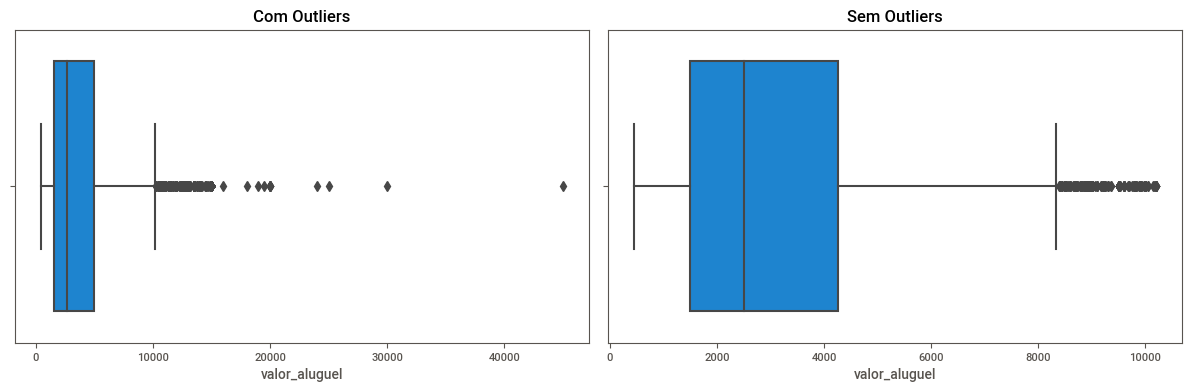

In [49]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('Com Outliers')
sns.boxplot(x= data['valor_aluguel'])

plt.subplot(1, 2, 2)
plt.title('Sem Outliers')
sns.boxplot(x= data_clean['valor_aluguel'])

plt.tight_layout(pad=1.0)
plt.show()

In [50]:
data_clean.describe()

area  num_quartos  num_banheiros      garagem  num_andares  \
count   9977.000000  9977.000000    9977.000000  9977.000000  9977.000000   
mean     134.480204     2.415957       2.092413     1.466573     5.243460   
std      550.667527     1.122319       1.289368     1.471634     5.842044   
min       11.000000     1.000000       1.000000     0.000000     1.000000   
25%       55.000000     2.000000       1.000000     0.000000     1.000000   
50%       85.000000     2.000000       2.000000     1.000000     3.000000   
75%      160.000000     3.000000       3.000000     2.000000     8.000000   
max    46335.000000    10.000000      10.000000    12.000000   301.000000   

       aceita_animais      mobilia  valor_aluguel  valor_condominio  \
count     9977.000000  9977.000000    9977.000000      9.977000e+03   
mean         0.774882     0.235341    3221.233337      1.068422e+03   
std          0.417681     0.424233    2296.025341      1.585605e+04   
min          0.000000     0.000000     450.000000      0.000000e+00   
25%          1.000000     0.000000    1500.000000      1.910000e+02   
50%          1.000000     0.000000    2500.000000      5.500000e+02   
75%          1.000000     0.000000    4250.000000      1.119000e+03   
max          1.000000     1.000000   10200.000000      1.117000e+06   

          valor_iptu  valor_seguro_incendio   estado__MG   estado__RJ  \
count    9977.000000            9977.000000  9977.000000  9977.000000   
mean      301.399218              43.940664     0.117570     0.144833   
std      3190.804271              32.114269     0.322115     0.351950   
min         0.000000               3.000000     0.000000     0.000000   
25%        34.000000              20.000000     0.000000     0.000000   
50%       110.000000              33.000000     0.000000     0.000000   
75%       307.000000              58.000000     0.000000     0.000000   
max    313700.000000             178.000000     1.000000     1.000000   

        estado__RS   estado__SP  cidade__Belo Horizonte  cidade__Campinas  \
count  9977.000000  9977.000000             9977.000000       9977.000000   
mean      0.117169     0.620427                0.117570          0.083993   
std       0.321638     0.485305                0.322115          0.277391   
min       0.000000     0.000000                0.000000          0.000000   
25%       0.000000     0.000000                0.000000          0.000000   
50%       0.000000     1.000000                0.000000          0.000000   
75%       0.000000     1.000000                0.000000          0.000000   
max       1.000000     1.000000                1.000000          1.000000   

       cidade__Porto Alegre  cidade__Rio De Janeiro  cidade__São Paulo  
count           9977.000000             9977.000000        9977.000000  
mean               0.117169                0.144833           0.536434  
std                0.321638                0.351950           0.498696  
min                0.000000                0.000000           0.000000  
25%                0.000000                0.000000           0.000000  
50%                0.000000                0.000000           1.000000  
75%                0.000000                0.000000           1.000000  
max                1.000000                1.000000           1.000000

Unificando os dataframes

In [51]:
data = data_clean

# Machine Learning

Separando os dados em features e classes.

In [52]:
y = data['valor_aluguel']
x = data.drop(['valor_aluguel'],axis =1)

Separando os conjuntos de treino e teste.

In [53]:
# função para calcular os resultados dos algoritmos
def calcula_metricas(y_test,preds):
    print('MAE:', mean_absolute_error(y_test, preds))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
    print('R2:', r2_score(y_test, preds))

In [54]:
# Separando para conjunto de testes e de treino
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.3)

In [55]:
acc=[]

### Calculando a nossa Baseline

Baseline é uma referência usada para comparar valores passados e presentes, dessa forma a empresa pode ter uma base para seus valores futuros.

nas células a baixo a gente cria um modelo simulando uma baseline, utilizando a média.

nosso objetivo e tornar nossos algoritmos mais eficientes que a baseline.

In [56]:
model = DummyRegressor(strategy="mean")

Iniciando o treinamento.

In [57]:
model.fit(X_train,y_train)

DummyRegressor()

Fazendo as predições

In [58]:
preds = model.predict(X_test)

Calculando as métricas.

In [59]:
calcula_metricas(y_test,preds)

MAE: 1796.5466094727046
RMSE: 2280.8114990549366
R2: -4.540913507189437e-05


Armazendo o resultado.

In [60]:
acc.append(
            [
              'BAS', r2_score(y_test,preds)
            ]
          )

In [61]:
acc

[['BAS', -4.540913507189437e-05]]

### Treinando um modelo de Regressão Linear

Basicamente esse modelo consiste em uma equação para estimar o valor esperado de y. esse modelo considera que a relação da resposta às variáveis é uma função linear de alguns parâmetros.

Esse modelo considera uma variável dependente (geralmente representada por y) e as variáveis independente.

- Regressão linear simples:

Considera apenas uma variável independente em relação a variavel dependente.

- Regressão linear múltipla

Considera duas ou mais variáveis independentes em relação a variavel dependente.

- links + info

https://oestatistico.com.br/regressao-linear-simples/

https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear

Instanciando o estimator.

In [62]:
model = LinearRegression()

Iniciando o treinamento.

In [63]:
model.fit(X_train,y_train)

LinearRegression()

Fazendo as predições

In [64]:
preds = model.predict(X_test)

Calculando as métricas.

In [65]:
calcula_metricas(y_test,preds)

MAE: 239.90553064652548
RMSE: 379.70670399326883
R2: 0.9722835590068236


Armazendo o resultado.

In [66]:
acc.append(
            [
              'LIR', r2_score(y_test,preds)
            ]
          )

In [67]:
acc

[['BAS', -4.540913507189437e-05], ['LIR', 0.9722835590068236]]

### Decision Tree Regression

Este Modelo é baseado em uma árvore de decisão. onde existe a "raiz"(variável target) que gera varios "nós", cada nó segue caminhos diferentes de acordo com o resultado da decisão, esses caminhos são titulado de "ramos". 

Basicamente o algoritmo realiza perguntas de sim ou não, que gera um nó de acordo com a resposta, e assim gera um fluxo formando a árvore de decisão.

Com isso esse algoritmo é muito util para previsões de classe, e consegue utilizar dados categóricos 

#### Entropia 

Quanto maior a entropia, maior a desordem dos dados; E quanto menor, maior será a ordem destes dados em relação a variavel target. Partindo da entropia, o algoritmo confere o ganho de informação de cada variável. Aquela que apresentar maior ganho de informação será a variável do primeiro nó da árvores.

#### regressão 

Nos problemas de regressão nosso objetivo é prever um valor, e não uma classe. Para isso a árvore utilizará os conceitos de média e desvio padrão, que possibilitarão um resultado final numérico.

- links + info

https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/

https://medium.com/turing-talks/turing-talks-17-modelos-de-predi%C3%A7%C3%A3o-decision-tree-610aa484cb05

Iniciando o treinamento.

In [68]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

Fazendo as predições

In [69]:
preds = model.predict(X_test)

Calculando as métricas.

In [70]:
calcula_metricas(y_test,preds)

MAE: 84.98396793587175
RMSE: 330.88700097590663
R2: 0.9789525083988776


Armazendo o resultado.

In [71]:
acc.append(['DTR',r2_score(y_test,preds)])

In [72]:
acc

[['BAS', -4.540913507189437e-05],
 ['LIR', 0.9722835590068236],
 ['DTR', 0.9789525083988776]]

### Random Forest

Este algoritmo se comporta de maneira parecida com o anterior. algumas diferenças são a criação de muitas árvores de decisão. Basicamente ele seleciona duas ou mais variáveis aleatórias (diferente do anterior que seleciona as váriaveis em sua totalidade) e utilizando o metodo de entropia ou de índice Gini ele seleciona quais dessa variáveis aleatorias será escolhida para compor o nó da raiz, basicamente o modelo segue assim sempre excluindo as váriaveis  já selecionadas até formar a árvore de decisão.

Cada árvore criada irá apresentar o seu resultado, sendo que em problemas de regressão será realizada a média dos valores previstos, e esta média informada como resultado final, e em problemas de classificação o resultado que mais vezes foi apresentado será o escolhido.

- Links + info

https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/

Iniciando o treinamento.

In [73]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

Fazendo as predições

In [74]:
preds = model.predict(X_test)

Calculando as métricas.

In [75]:
calcula_metricas(y_test,preds)

MAE: 74.27533540361146
RMSE: 254.23572017426994
R2: 0.9875744943634082


Armazendo o resultado.

In [76]:
acc.append(['RFN',r2_score(y_test,model.predict(X_test))])

In [77]:
acc

[['BAS', -4.540913507189437e-05],
 ['LIR', 0.9722835590068236],
 ['DTR', 0.9789525083988776],
 ['RFN', 0.9875744943634082]]

### KNN Regressor

Esse Modelo basicamente Prevê comparando o quão similar os dados de treinamento são com os dados informados para a previsão.

Para realizar a previsão ele usa cálculos matemáticos (Euclidiana, Manhattan, Minkowski, Ponderada) para verificar o quão similar esse dados informados são com os dados usados no treinamento do modelo.

- Links + info

https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e

Iniciando o treinamento.

In [78]:
model = KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

Fazendo as predições

In [79]:
preds = model.predict(X_test)

Calculando as métricas.

In [80]:
calcula_metricas(y_test,preds)

MAE: 683.3798931195724
RMSE: 1062.4189618826474
R2: 0.7830135775987359


Armazendo o resultado.

In [81]:
acc.append(['KNNR',r2_score(y_test,model.predict(X_test))])

In [82]:
acc

[['BAS', -4.540913507189437e-05],
 ['LIR', 0.9722835590068236],
 ['DTR', 0.9789525083988776],
 ['RFN', 0.9875744943634082],
 ['KNNR', 0.7830135775987359]]

Ordenando os resultados.

In [83]:
acc.sort(key = lambda y:y[1],reverse =True)

In [84]:
acc

[['RFN', 0.9875744943634082],
 ['DTR', 0.9789525083988776],
 ['LIR', 0.9722835590068236],
 ['KNNR', 0.7830135775987359],
 ['BAS', -4.540913507189437e-05]]

## Pycaret

Essa Biblioteca ajuda a selecionar qual melhor modelo para as previsões, dentre outras diversas funções.

In [85]:
connect_dw_imoveis = sqlite3.connect("../data/imoveis_dw.db")

In [86]:
data2 = pd.read_sql_query(r"""
    SELECT * FROM IMOVEIS
    """, 
    connect_dw_imoveis
    )

In [87]:
data2.head()

cidade estado  area  num_quartos  num_banheiros  garagem  \
0     São Paulo     SP    70            2              1        1   
1     São Paulo     SP   320            4              4        0   
2  Porto Alegre     RS    80            1              1        1   
3  Porto Alegre     RS    51            2              1        0   
4     São Paulo     SP    25            1              1        0   

   num_andares  aceita_animais  mobilia  valor_aluguel  valor_condominio  \
0            7               1        1           3300              2065   
1           20               1        0           4960              1200   
2            6               1        0           2800              1000   
3            2               1        0           1112               270   
4            1               0        0            800                 0   

   valor_iptu  valor_seguro_incendio  
0         211                     42  
1        1750                     63  
2           0                     41  
3          22                     17  
4          25                     11

In [92]:
s = setup( data2
          ,target = 'valor_aluguel'
          ,numeric_features = [ 'num_quartos'
                               ,'num_banheiros'
                               ,'garagem'
                               ,'num_andares'
                               ,'aceita_animais'
                               ,'mobilia']
          ,log_experiment = True
          ,experiment_name = 'exp-bootcamp'
          ,data_split_shuffle=True
         )

IntProgress(value=0, description='Processing: ', max=3)

Initiated  . . . . . . . . . . . . . . . . . .                     12:36:21
Status     . . . . . . . . . . . . . . . . . .  Preparing Data for Modeling

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

### Validação cruzada k-fold

para treinar o modelo e evitar problemas de overfitting, o conjunto de dados é dividido em partes, e então usa a primeira parte para testar e o resto para treinar, depois ele realiza outro treinamento agora com a segunda parte para teste e o resto (incluindo a primeira parte) para treinamento, ele continua assim de forma que todos os dados foram usados tanto para teste como para treinamento.

Fold = representa em quantas partes o modelo será dividido

- Links + info

https://drigols.medium.com/introdu%C3%A7%C3%A3o-a-valida%C3%A7%C3%A3o-cruzada-k-fold-2a6bced32a90

Comparando os modelos 

In [89]:
best = compare_models(fold = 5)

NameError: name '_all_models' is not defined

Listando os modelos

In [ ]:
models()

Selecionando o melhor algoritmo

In [ ]:
catboost = create_model('catboost', fold = 5)

Otimizando o modelo

a célula a baixo ajusta os parâmetros do modelo, para torna-lo mais eficiente

In [ ]:
tuned_et = tune_model(catboost,fold=5)

Visualizando os residuais

In [ ]:
plot_model(catboost)

Visualizando o erro do modelo

In [ ]:
plot_model(catboost, plot = 'error')

Visualizando as features importantes

In [ ]:
plot_model(catboost, plot='feature')

Finaliza o modelo

In [ ]:
final_catboost = finalize_model(catboost)

Salva o modelo

In [ ]:
save_model(final_catboost,'modelo-final')

In [ ]:
!ls

### Test Time

In [ ]:
model_test = load_model('modelo-final')

In [ ]:
data_teste = data2.drop(["valor_aluguel"],axis=1)

In [ ]:
predict_model(model_test, data=data_teste)